In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/keywords-imdb/__results__.html
/kaggle/input/keywords-imdb/__notebook_source__.ipynb
/kaggle/input/keywords-imdb/__notebook__.ipynb
/kaggle/input/keywords-imdb/keywords_edited.csv
/kaggle/input/keywords-imdb/__output__.json
/kaggle/input/keywords-imdb/custom.css
/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv
from ast import literal_eval
import ast

In [3]:
movies = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')
keywords = pd.read_csv('/kaggle/input/keywords-imdb/keywords_edited.csv')

/tmp/ipykernel_20/3813422067.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')


In [4]:
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [5]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [6]:
movies.adult.value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [7]:
movies[movies['adult'] == ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
movies.drop(29503, inplace = True)

In [9]:
movies.iloc[29503]

adult                                                                False
belongs_to_collection                                                  NaN
budget                                                                   0
genres                   [{'id': 10770, 'name': 'TV Movie'}, {'id': 35,...
homepage                                                               NaN
id                                                                   50794
imdb_id                                                          tt0327698
original_language                                                       en
original_title                                      The Even Stevens Movie
overview                 The Stevens think that they've won an all-expe...
popularity                                                        3.352237
poster_path                               /iXq9a9QDq5ZNPDsHgM6HJgT42QM.jpg
production_companies                                                    []
production_countries     

In [10]:
movies[movies['adult'] == ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
movies.drop(35587, inplace = True)

In [12]:
movies[movies['adult'] == ' - Written by Ørnås']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
movies.drop(19730, inplace = True)

In [14]:
movies.reset_index(inplace = True, drop=True)

In [15]:
for col in movies.columns:
    print(col)
    print(movies[col].value_counts())

adult
False    45454
True         9
Name: adult, dtype: int64
belongs_to_collection
{'id': 415931, 'name': 'The Bowery Boys', 'poster_path': '/q6sA4bzMT9cK7EEmXYwt7PNrL5h.jpg', 'backdrop_path': '/foe3kuiJmg5AklhtD3skWbaTMf2.jpg'}                 29
{'id': 421566, 'name': 'Totò Collection', 'poster_path': '/4ayJsjC3djGwU9eCWUokdBWvdLC.jpg', 'backdrop_path': '/jaUuprubvAxXLAY5hUfrNjxccUh.jpg'}                 27
{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg', 'backdrop_path': '/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg'}               26
{'id': 96887, 'name': 'Zatôichi: The Blind Swordsman', 'poster_path': '/8Q31DAtmFJjhFTwQGXghBUCgWK2.jpg', 'backdrop_path': '/bY8gLImMR5Pr9PaG3ZpobfaAQ8N.jpg'}    26
{'id': 37261, 'name': 'The Carry On Collection', 'poster_path': '/2P0HNrYgKDvirV8RCdT1rBSJdbJ.jpg', 'backdrop_path': '/38tF1LJN7ULeZAuAfP7beaPMfcl.jpg'}          25
                                                                                           

In [16]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25051
title                        3
video                        3
vote_average                 3
vote_count                   3
dtype: int64

In [17]:
movies.drop_duplicates(inplace=True)

In [18]:
movies.reset_index(inplace=True, drop=True)

In [19]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40959
budget                       0
genres                       0
homepage                 37673
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25042
title                        3
video                        3
vote_average                 3
vote_count                   3
dtype: int64

In [20]:
movies.id.value_counts()

265189    2
69234     2
22649     2
14788     2
132641    2
         ..
54117     1
4180      1
55135     1
15877     1
461257    1
Name: id, Length: 45433, dtype: int64

In [21]:
movies[movies['id'] == '265189']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
24154,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,265189,tt2121382,sv,Turist,"While holidaying in the French Alps, a Swedish...",...,2014-08-15,1359497.0,118.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Force Majeure,False,6.8,255.0
45249,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,265189,tt2121382,sv,Turist,"While holidaying in the French Alps, a Swedish...",...,2014-08-15,1359497.0,118.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Force Majeure,False,6.8,255.0


In [22]:
movies.drop_duplicates(subset = ['id'], inplace=True)

In [23]:
movies.reset_index(inplace=True, drop=True)

In [24]:
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45428,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45429,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45430,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45431,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [25]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45433 entries, 0 to 45432
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45433 non-null  object 
 1   belongs_to_collection  4488 non-null   object 
 2   budget                 45433 non-null  object 
 3   genres                 45433 non-null  object 
 4   homepage               7774 non-null   object 
 5   id                     45433 non-null  object 
 6   imdb_id                45416 non-null  object 
 7   original_language      45422 non-null  object 
 8   original_title         45433 non-null  object 
 9   overview               44479 non-null  object 
 10  popularity             45430 non-null  object 
 11  poster_path            45047 non-null  object 
 12  production_companies   45430 non-null  object 
 13  production_countries   45430 non-null  object 
 14  release_date           45346 non-null  object 
 15  re

In [26]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40945
budget                       0
genres                       0
homepage                 37659
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25032
title                        3
video                        3
vote_average                 3
vote_count                   3
dtype: int64

In [27]:
movies.dropna(subset = ['imdb_id'], inplace = True)

In [28]:
movies.dropna(subset=['vote_count'], inplace=True)

In [29]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40928
budget                       0
genres                       0
homepage                 37641
id                           0
imdb_id                      0
original_language           11
original_title               0
overview                   952
popularity                   0
poster_path                378
production_companies         0
production_countries         0
release_date                81
revenue                      0
runtime                    255
spoken_languages             0
status                      81
tagline                  25016
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64

In [30]:
def get_text(text, obj='name'):
    if pd.isna(text):
        return np.nan
    
    return ast.literal_eval(text)[obj]

In [31]:
movies['belongs_to_collection'] = movies.belongs_to_collection.apply(get_text, obj = "name")


In [32]:
movies['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [33]:
ast.literal_eval(movies['genres'][0])[1]['name']

'Comedy'

In [34]:
def to_dict(x):
    if isinstance(x, str) == True:
        lst = ast.literal_eval(x)
        return lst
    else:
        return np.nan

In [35]:
movies["genres"] = movies["genres"].apply(lambda x: to_dict(x))


In [36]:
type(movies.genres[0])

list

In [37]:
def combine(x):
    lst = []
    if isinstance(x, list) == True:
        for i in x:
            lst.append(i['name'])
        return '|'.join(lst)
    else:
        np.nan

In [38]:
movies["genres"] = movies["genres"].apply(lambda x: combine(x))


In [39]:
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,Animation|Comedy|Family,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,Adventure|Fantasy|Family,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,Romance|Comedy,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,Comedy|Drama|Romance,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,Comedy,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45428,False,NaN,0,Drama|Family,http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45429,False,NaN,0,Drama,NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45430,False,NaN,0,Action|Drama|Thriller,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45431,False,NaN,0,,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [40]:
movies["production_companies"]

0           [{'name': 'Pixar Animation Studios', 'id': 3}]
1        [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2        [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3        [{'name': 'Twentieth Century Fox Film Corporat...
4        [{'name': 'Sandollar Productions', 'id': 5842}...
                               ...                        
45428                                                   []
45429               [{'name': 'Sine Olivia', 'id': 19653}]
45430    [{'name': 'American World Pictures', 'id': 6165}]
45431                 [{'name': 'Yermoliev', 'id': 88753}]
45432                                                   []
Name: production_companies, Length: 45413, dtype: object

In [41]:
movies["production_companies"] = movies["production_companies"].apply(lambda x: to_dict(x))
movies["production_companies"] = movies["production_companies"].apply(lambda x: combine(x))



In [42]:
movies["production_companies"]

0                                  Pixar Animation Studios
1        TriStar Pictures|Teitler Film|Interscope Commu...
2                              Warner Bros.|Lancaster Gate
3                   Twentieth Century Fox Film Corporation
4                Sandollar Productions|Touchstone Pictures
                               ...                        
45428                                                     
45429                                          Sine Olivia
45430                              American World Pictures
45431                                            Yermoliev
45432                                                     
Name: production_companies, Length: 45413, dtype: object

In [43]:
movies["production_countries"] = movies["production_countries"].apply(lambda x: to_dict(x))
movies["production_countries"] = movies["production_countries"].apply(lambda x: combine(x))

In [44]:
movies["production_countries"]

0        United States of America
1        United States of America
2        United States of America
3        United States of America
4        United States of America
                   ...           
45428                        Iran
45429                 Philippines
45430    United States of America
45431                      Russia
45432              United Kingdom
Name: production_countries, Length: 45413, dtype: object

In [45]:
movies["spoken_languages"] = movies["spoken_languages"].apply(lambda x: to_dict(x))
movies["spoken_languages"] = movies["spoken_languages"].apply(lambda x: combine(x))

In [46]:
movies["spoken_languages"]

0                 English
1        English|Français
2                 English
3                 English
4                 English
               ...       
45428               فارسی
45429                    
45430             English
45431                    
45432             English
Name: spoken_languages, Length: 45413, dtype: object

In [47]:
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,Animation|Comedy|Family,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,English,Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,Adventure|Fantasy|Family,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,English|Français,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,Romance|Comedy,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,Comedy|Drama|Romance,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,Comedy,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45428,False,NaN,0,Drama|Family,http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,فارسی,Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45429,False,NaN,0,Drama,NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,,Released,NaN,Century of Birthing,False,9.0,3.0
45430,False,NaN,0,Action|Drama|Thriller,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,English,Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45431,False,NaN,0,,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,,Released,NaN,Satan Triumphant,False,0.0,0.0


In [48]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45413 entries, 0 to 45432
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45413 non-null  object 
 1   belongs_to_collection  4485 non-null   object 
 2   budget                 45413 non-null  object 
 3   genres                 45413 non-null  object 
 4   homepage               7772 non-null   object 
 5   id                     45413 non-null  object 
 6   imdb_id                45413 non-null  object 
 7   original_language      45402 non-null  object 
 8   original_title         45413 non-null  object 
 9   overview               44461 non-null  object 
 10  popularity             45413 non-null  object 
 11  poster_path            45035 non-null  object 
 12  production_companies   45413 non-null  object 
 13  production_countries   45413 non-null  object 
 14  release_date           45332 non-null  object 
 15  re

In [49]:
movies["id"] = pd.to_numeric(movies["id"], errors="raise", downcast="integer")


In [50]:
movies["budget"] = pd.to_numeric(movies["budget"], errors="raise")

In [51]:
movies["popularity"] = pd.to_numeric(movies["popularity"], errors="raise")

In [52]:
movies["release_date"] = pd.to_datetime(movies["release_date"], errors = "raise")

In [53]:
movies["release_date"].value_counts(dropna=False)

2008-01-01    136
2009-01-01    121
2007-01-01    117
2005-01-01    111
2006-01-01    101
             ... 
1945-08-24      1
1941-12-31      1
1937-10-22      1
1948-07-14      1
1917-10-21      1
Name: release_date, Length: 17334, dtype: int64

In [54]:
col = ["genres", "spoken_languages", "production_companies", "production_countries"]
movies[col] = movies[col].replace("", np.nan)

In [55]:
movies["budget"].value_counts(dropna = False)

0            36535
5000000        286
10000000       258
20000000       243
2000000        242
             ...  
82500000         1
270000000        1
923              1
72500000         1
1254040          1
Name: budget, Length: 1223, dtype: int64

In [56]:
col2 = ["budget", "revenue", "runtime"]
movies[col2] = movies[col2].replace(0, np.nan)

In [57]:
movies["revenue"] = movies["revenue"] / 1000000
movies["budget"] = movies["budget"] / 1000000

In [58]:
movies["tagline"].value_counts()

Based on a true story.                                                 7
-                                                                      4
Trust no one.                                                          4
Be careful what you wish for.                                          4
How far would you go?                                                  3
                                                                      ..
It's nice work - and you can get it!                                   1
A combo of scuba dupes rock up a storm in a mad pad under the surf!    1
An Adventurous Race Against Time!                                      1
This movie is bigger than all of us!                                   1
A deadly game of wits.                                                 1
Name: tagline, Length: 20279, dtype: int64

In [59]:
movies["tagline"] = movies["tagline"].replace("-", np.nan)

In [60]:
movies["vote_average"].value_counts()

0.0    2989
6.0    2467
5.0    1996
7.0    1884
6.5    1721
       ... 
9.4       3
9.6       1
9.8       1
0.7       1
1.1       1
Name: vote_average, Length: 92, dtype: int64

In [61]:
movies["vote_count"].value_counts()

1.0       3260
2.0       3131
0.0       2890
3.0       2779
4.0       2479
          ... 
2755.0       1
1187.0       1
4200.0       1
3322.0       1
2712.0       1
Name: vote_count, Length: 1820, dtype: int64

In [62]:
movies[["vote_count", "vote_average"]][(movies["vote_average"] == 0) & (movies["vote_count"] > 0)]


,vote_count,vote_average
554,1.0,0.0
1371,1.0,0.0
1563,1.0,0.0
12270,1.0,0.0
13222,1.0,0.0
...,...,...
44505,1.0,0.0
44750,1.0,0.0
44841,2.0,0.0
44974,4.0,0.0


In [63]:
movies.dropna(subset = ['release_date'],axis=0,inplace=True)
movies['release_year'] = movies['release_date'].dt.year
movies['release_month'] = movies['release_date'].dt.month

In [64]:
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_year,release_month
0,False,Toy Story Collection,30.0,Animation|Comedy|Family,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,English,Released,NaN,Toy Story,False,7.7,5415.0,1995,10
1,False,NaN,65.0,Adventure|Fantasy|Family,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,English|Français,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,12
2,False,Grumpy Old Men Collection,NaN,Romance|Comedy,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,12
3,False,NaN,16.0,Comedy|Drama|Romance,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,12
4,False,Father of the Bride Collection,NaN,Comedy,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45427,False,NaN,NaN,Drama|Action|Romance,NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",...,104.0,English,Released,NaN,Robin Hood,False,5.7,26.0,1991,5
45429,False,NaN,NaN,Drama,NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,360.0,NaN,Released,NaN,Century of Birthing,False,9.0,3.0,2011,11
45430,False,NaN,NaN,Action|Drama|Thriller,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,90.0,English,Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003,8
45431,False,NaN,NaN,NaN,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,87.0,NaN,Released,NaN,Satan Triumphant,False,0.0,0.0,1917,10


In [65]:
movies['belongs_to_collection'] = movies['belongs_to_collection'].fillna('None')
movies[['collection_name']] = movies[['belongs_to_collection']]
movies['belongs_to_collection'] = movies['belongs_to_collection'].map(lambda x: 0 if x == 'None' else 1)

In [66]:
franchise = movies.dropna().groupby(by='collection_name').agg({'revenue':['sum','mean'], 
                                                               'budget':['sum','mean'],
                                                               'title':'count',
                                                               'popularity':'mean'
                                                              })
most_films_franchise = franchise.sort_values([('title','count')],ascending=False)[1:20]

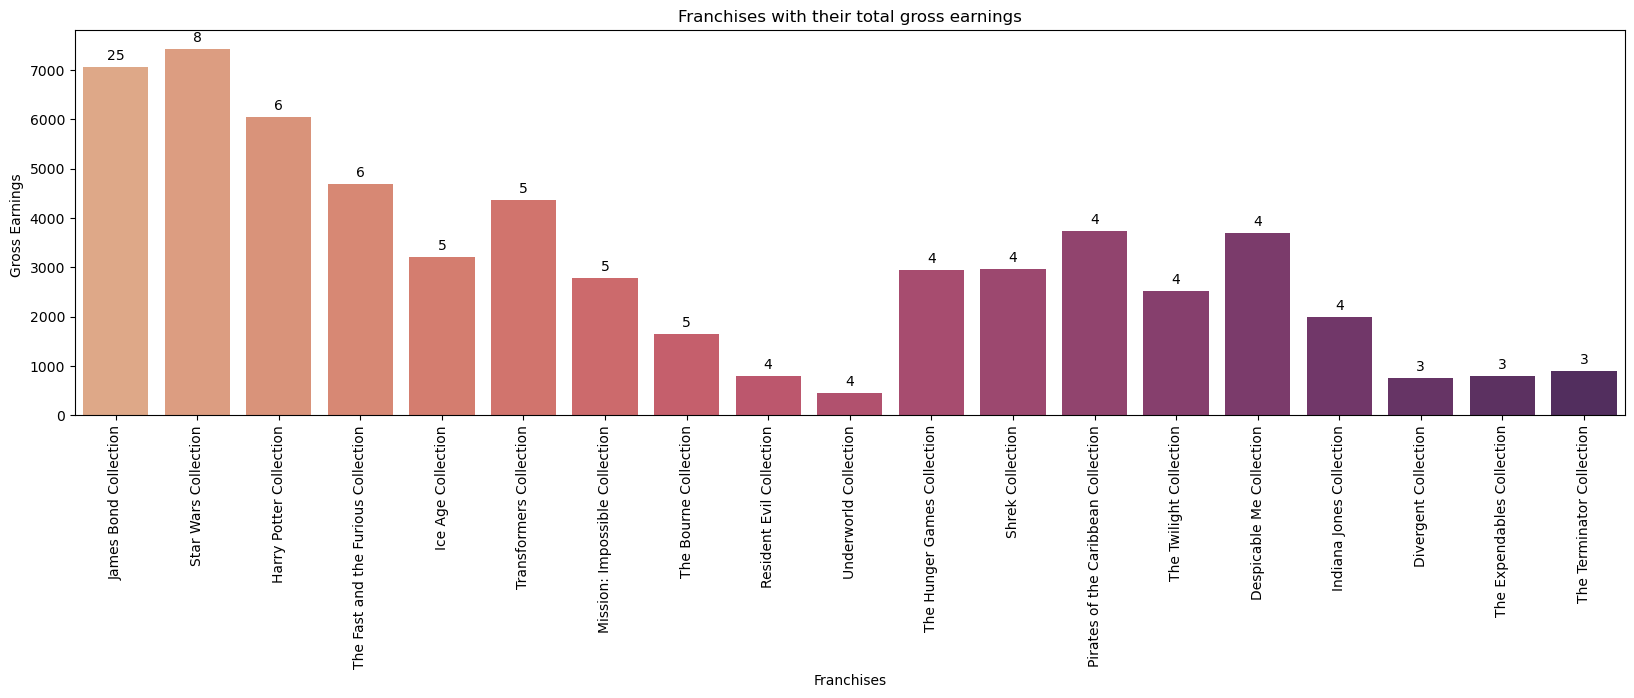

In [67]:
plt.figure(figsize=(20,5))
ax = sns.barplot(y=most_films_franchise[('revenue','sum')],x=most_films_franchise.index,errorbar=None , palette = "flare")
plt.xlabel('Franchises')
plt.title('Franchises with their total gross earnings')
plt.ylabel('Gross Earnings ')
plt.xticks(rotation=90)


count = most_films_franchise[('title','count')]
ax.bar_label(ax.containers[0], labels=count, padding=3)

plt.show()

In [68]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
def get_day(x):
    try:  
        answer = x.weekday()
        return day_order[answer]
    except:
        return np.nan

movies['day'] = movies['release_date'].apply(get_day)

In [69]:
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,release_year,release_month,collection_name,day
0,False,1,30.0,Animation|Comedy|Family,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,1995,10,Toy Story Collection,Mon
1,False,0,65.0,Adventure|Fantasy|Family,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,12,None,Fri
2,False,1,NaN,Romance|Comedy,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,12,Grumpy Old Men Collection,Fri
3,False,0,16.0,Comedy|Drama|Romance,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,12,None,Fri
4,False,1,NaN,Comedy,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995,2,Father of the Bride Collection,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45427,False,0,NaN,Drama|Action|Romance,NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",...,Released,NaN,Robin Hood,False,5.7,26.0,1991,5,None,Mon
45429,False,0,NaN,Drama,NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,Released,NaN,Century of Birthing,False,9.0,3.0,2011,11,None,Thu
45430,False,0,NaN,Action|Drama|Thriller,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003,8,None,Fri
45431,False,0,NaN,NaN,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,Released,NaN,Satan Triumphant,False,0.0,0.0,1917,10,None,Sun


In [70]:
movies['runtime'] = movies['runtime'].replace(0,np.nan)
movies['runtime'].fillna(movies['runtime'].mean(),inplace=True)

In [71]:
movies['status'].fillna(movies['status'].mode()[0],inplace=True)

In [72]:
print(movies.budget.describe())
print(movies.revenue.describe())

count    8875.000000
mean       21.625866
std        34.331675
min         0.000001
25%         2.000000
50%         8.000000
75%        25.000000
max       380.000000
Name: budget, dtype: float64
count    7397.000000
mean       68.865936
std       146.512495
min         0.000001
25%         2.401510
50%        16.838910
75%        67.312826
max      2787.965087
Name: revenue, dtype: float64


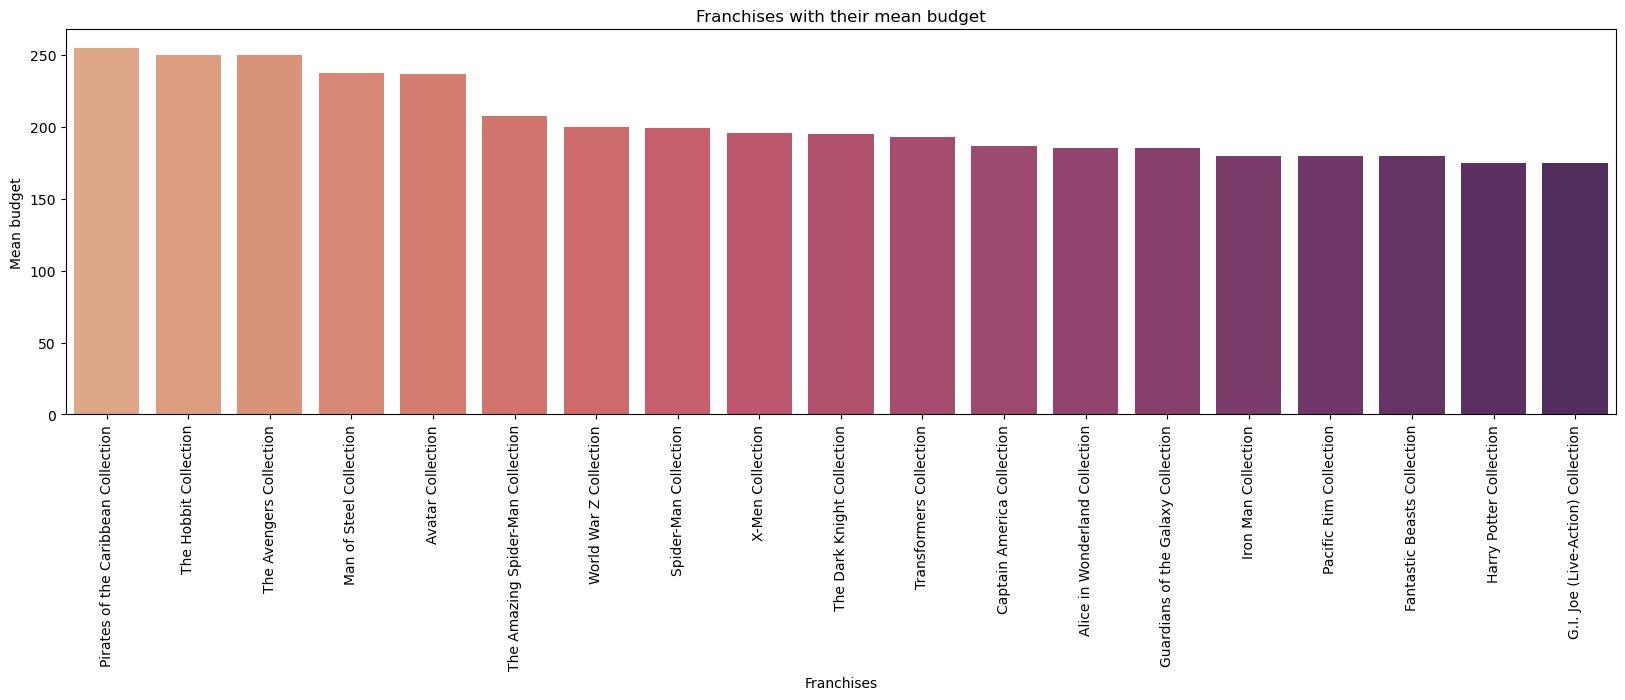

In [73]:
franchise_mean_budget = franchise.sort_values([('budget','mean')],ascending=False)[1:20]

plt.figure(figsize=(20,5))
ax = sns.barplot(y=franchise_mean_budget[('budget','mean')],x=franchise_mean_budget.index,errorbar=None , palette = "flare")
plt.xlabel('Franchises')
plt.title('Franchises with their mean budget')
plt.ylabel('Mean budget')
plt.xticks(rotation=90)
plt.show()

In [74]:
franchise.sort_values([('revenue','sum')],ascending=False)[1:10]

revenue                budget  \
                                             sum         mean      sum   
collection_name                                                          
Star Wars Collection                 7434.494790   929.311849   854.35   
James Bond Collection                7065.225521   282.609021  1527.65   
Harry Potter Collection              6040.874389  1006.812398  1050.00   
The Fast and the Furious Collection  4681.464207   780.244034   895.00   
Transformers Collection              4366.101244   873.220249   965.00   
Pirates of the Caribbean Collection  3727.384838   931.846209  1020.00   
Despicable Me Collection             3691.070216   922.767554   299.00   
Ice Age Collection                   3216.708553   643.341711   429.00   
Shrek Collection                     2955.807008   738.951752   535.00   

                                                title  popularity  
                                           mean count        mean  
collection_name                                                    
Star Wars Collection                 106.793750     8   23.410919  
James Bond Collection                 61.106000    25   13.459622  
Harry Potter Collection              175.000000     6   25.304903  
The Fast and the Furious Collection  149.166667     6   13.777447  
Transformers Collection              193.000000     5   14.425077  
Pirates of the Caribbean Collection  255.000000     4   34.008341  
Despicable Me Collection              74.750000     4  157.804467  
Ice Age Collection                    85.800000     5   16.075234  
Shrek Collection                     133.750000     4   15.023469

In [75]:
franchise.sort_values([('revenue','mean')],ascending=False)[1:10]

revenue                budget  \
                                             sum         mean      sum   
collection_name                                                          
The Avengers Collection              2924.961604  1462.480802   500.00   
Frozen Collection                    1274.219009  1274.219009   150.00   
Jurassic Park Collection             2433.628810  1216.814405   213.00   
Harry Potter Collection              6040.874389  1006.812398  1050.00   
Finding Nemo Collection              1968.906425   984.453213   294.00   
The Hobbit Collection                2935.523356   978.507785   750.00   
The Lord of the Rings Collection     2916.544743   972.181581   266.00   
Pirates of the Caribbean Collection  3727.384838   931.846209  1020.00   
Star Wars Collection                 7434.494790   929.311849   854.35   

                                                title popularity  
                                           mean count       mean  
collection_name                                                   
The Avengers Collection              250.000000     2  63.633534  
Frozen Collection                    150.000000     1  24.248243  
Jurassic Park Collection             106.500000     2  20.827126  
Harry Potter Collection              175.000000     6  25.304903  
Finding Nemo Collection              147.000000     2  19.987735  
The Hobbit Collection                250.000000     3  25.205614  
The Lord of the Rings Collection      88.666667     3  30.272873  
Pirates of the Caribbean Collection  255.000000     4  34.008341  
Star Wars Collection                 106.793750     8  23.410919

In [76]:
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,release_year,release_month,collection_name,day
0,False,1,30.0,Animation|Comedy|Family,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,1995,10,Toy Story Collection,Mon
1,False,0,65.0,Adventure|Fantasy|Family,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,12,None,Fri
2,False,1,NaN,Romance|Comedy,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,12,Grumpy Old Men Collection,Fri
3,False,0,16.0,Comedy|Drama|Romance,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,12,None,Fri
4,False,1,NaN,Comedy,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995,2,Father of the Bride Collection,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45427,False,0,NaN,Drama|Action|Romance,NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",...,Released,NaN,Robin Hood,False,5.7,26.0,1991,5,None,Mon
45429,False,0,NaN,Drama,NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,Released,NaN,Century of Birthing,False,9.0,3.0,2011,11,None,Thu
45430,False,0,NaN,Action|Drama|Thriller,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003,8,None,Fri
45431,False,0,NaN,NaN,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,Released,NaN,Satan Triumphant,False,0.0,0.0,1917,10,None,Sun


In [77]:
def get_all_items(df , col):
    all_items = {}
    for row in df[col]:
        counter = 0
        if row == np.nan or isinstance(row,float) :
            continue
        for single_value in row:  
            value = all_items.get(single_value)
            if value == None:
                all_items[single_value] = counter + 1
            else:
                all_items[single_value] = value + 1
    return all_items
movies['genres'] = movies['genres'].str.split('|')

# get all genres
all_genres = get_all_items(movies , 'genres')

In [78]:
all_genres

{'Animation': 1925,
 'Comedy': 13172,
 'Family': 2765,
 'Adventure': 3485,
 'Fantasy': 2307,
 'Romance': 6726,
 'Drama': 20230,
 'Action': 6585,
 'Crime': 4301,
 'Thriller': 7613,
 'Horror': 4668,
 'History': 1396,
 'Science Fiction': 3036,
 'Mystery': 2461,
 'War': 1322,
 'Foreign': 1616,
 'Music': 1597,
 'Documentary': 3918,
 'Western': 1041,
 'TV Movie': 765}

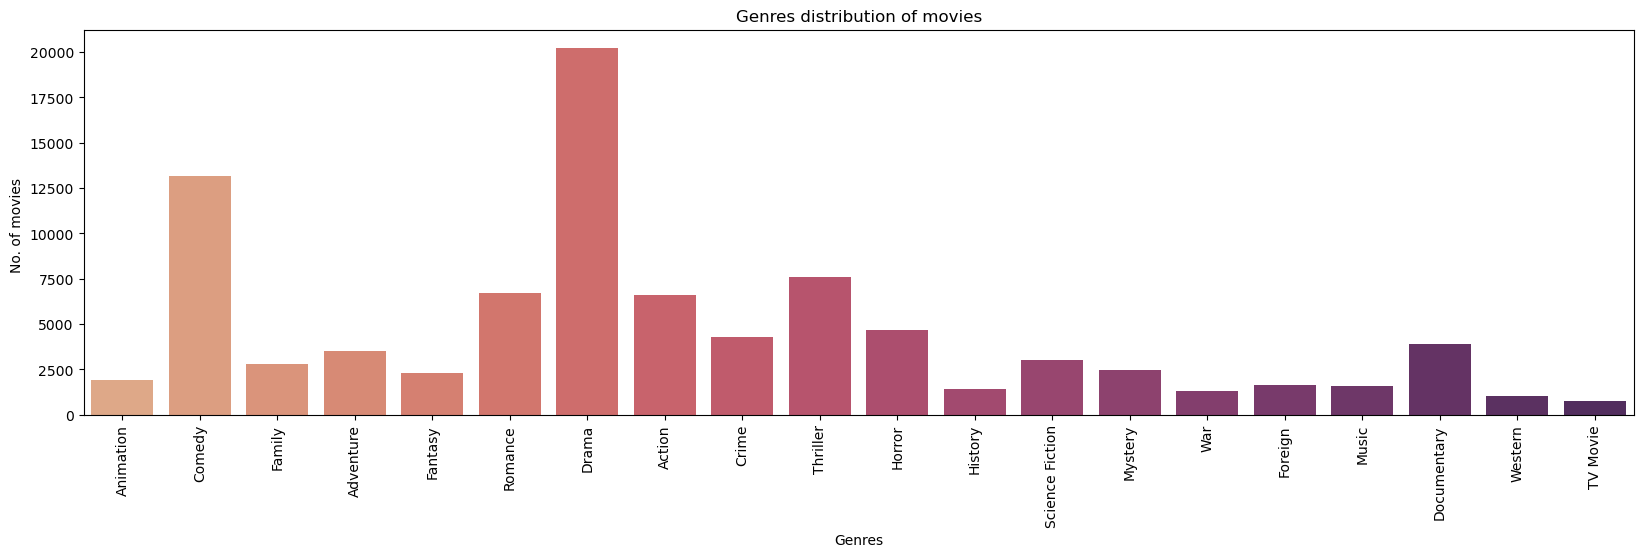

In [79]:
fig = plt.figure(figsize = (20, 5))
all_genre_keys = list(all_genres.keys())
all_genre_values = [int(i) for i in all_genres.values()]
sns.barplot(x=all_genre_keys, y = all_genre_values, palette = "flare")
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('No. of movies ')
plt.title('Genres distribution of movies')
plt.show()

In [80]:
movies['production_companies'] = movies['production_companies'].str.split('|')

In [81]:
all_companies = get_all_items(movies ,'production_companies')
major_prod_company = {k:v for (k,v) in all_companies.items() if v > 50}

# get all production countries


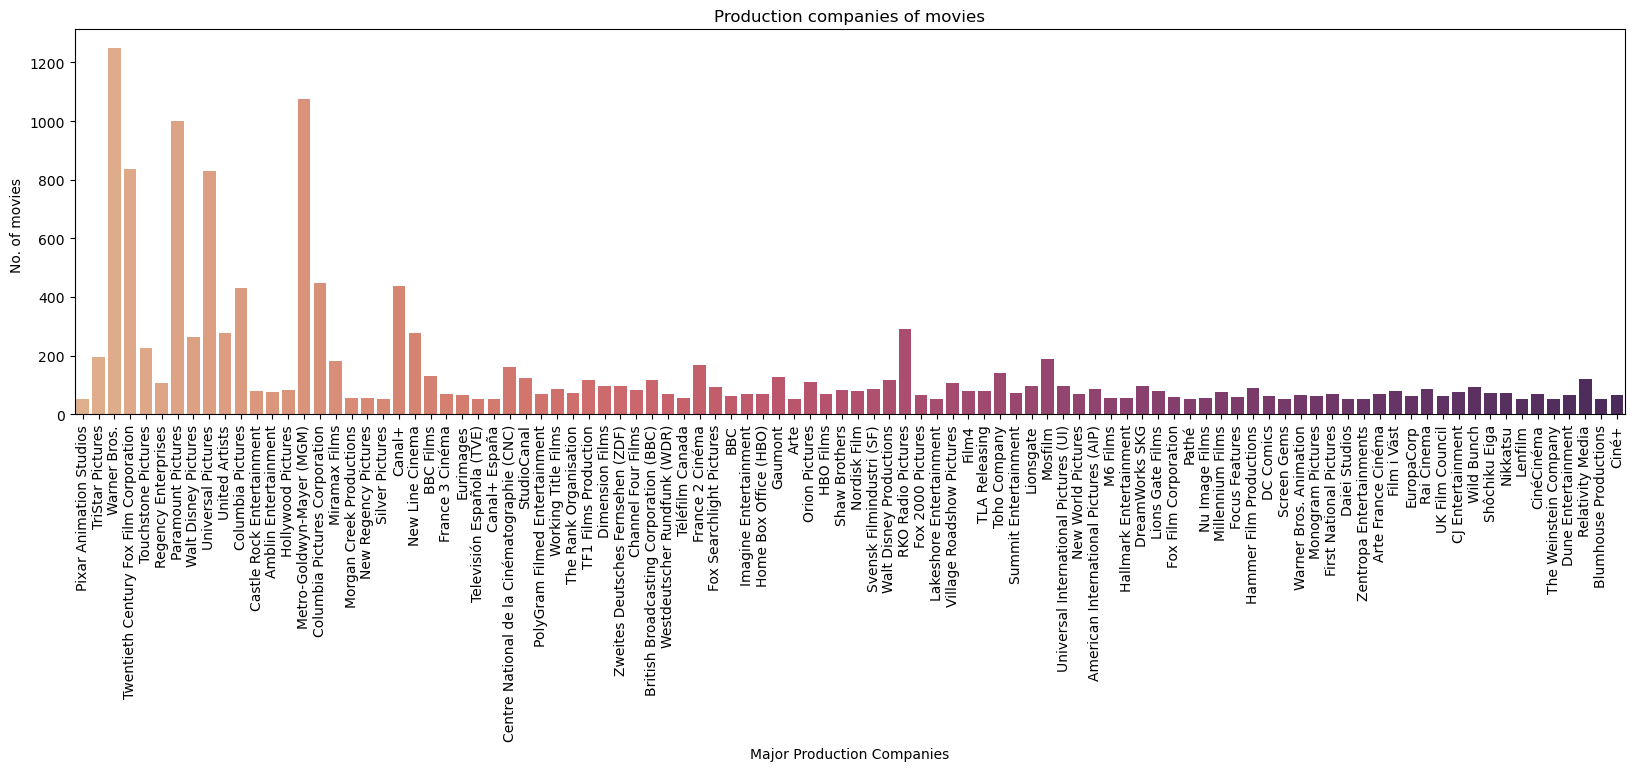

In [82]:
fig = plt.figure(figsize = (20, 5))
prod_keys = list(major_prod_company.keys())
prod_values = [int(i) for i in major_prod_company.values()]
sns.barplot(x=prod_keys, y = prod_values , palette = 'flare')
plt.xticks(rotation=90)
plt.xlabel('Major Production Companies')
plt.ylabel('No. of movies ')
plt.title('Production companies of movies')
plt.show()

In [83]:
movies['production_countries'] = movies['production_countries'].str.split('|')
all_countries = get_all_items(movies ,'production_countries')

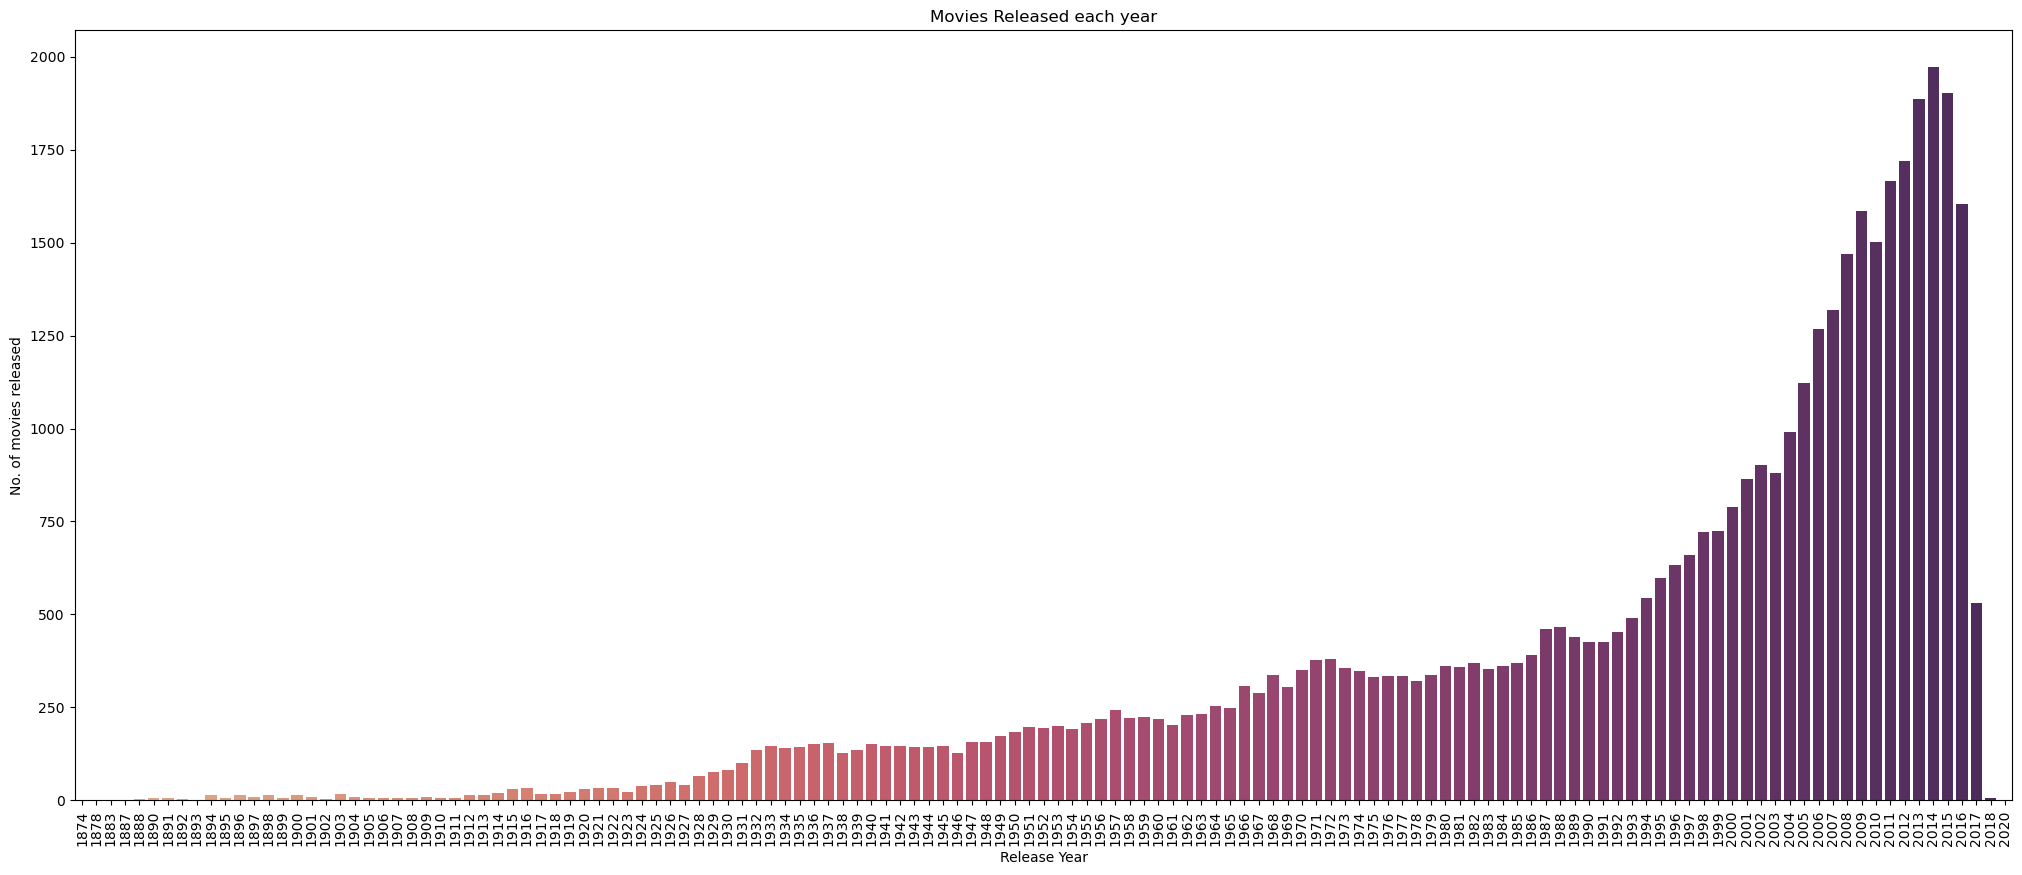

In [84]:
year_name = movies['release_year'].value_counts().index.tolist()
year_count = movies['release_year'].value_counts().tolist()

fig = plt.figure(figsize = (25, 10))
sns.barplot(x=year_name,y=year_count, palette='flare')
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('No. of movies released')
plt.title('Movies Released each year')
plt.show()

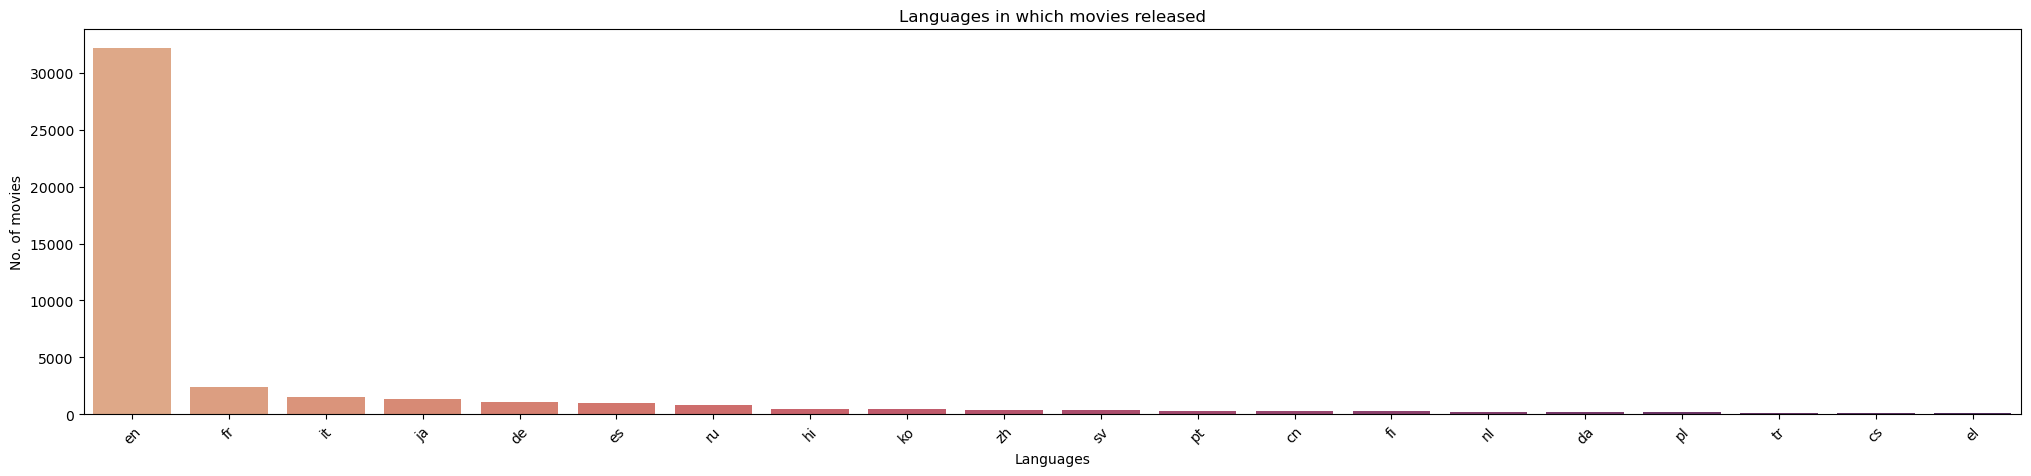

In [85]:
lang_name = movies['original_language'].value_counts().index.tolist()[0:20]
lang_count = movies['original_language'].value_counts().tolist()[0:20]

fig = plt.figure(figsize = (25, 5))
sns.barplot(x=lang_name,y=lang_count, palette='flare')
plt.xticks(rotation=45)
plt.xlabel('Languages')
plt.ylabel('No. of movies')
plt.title('Languages in which movies released')
plt.show()

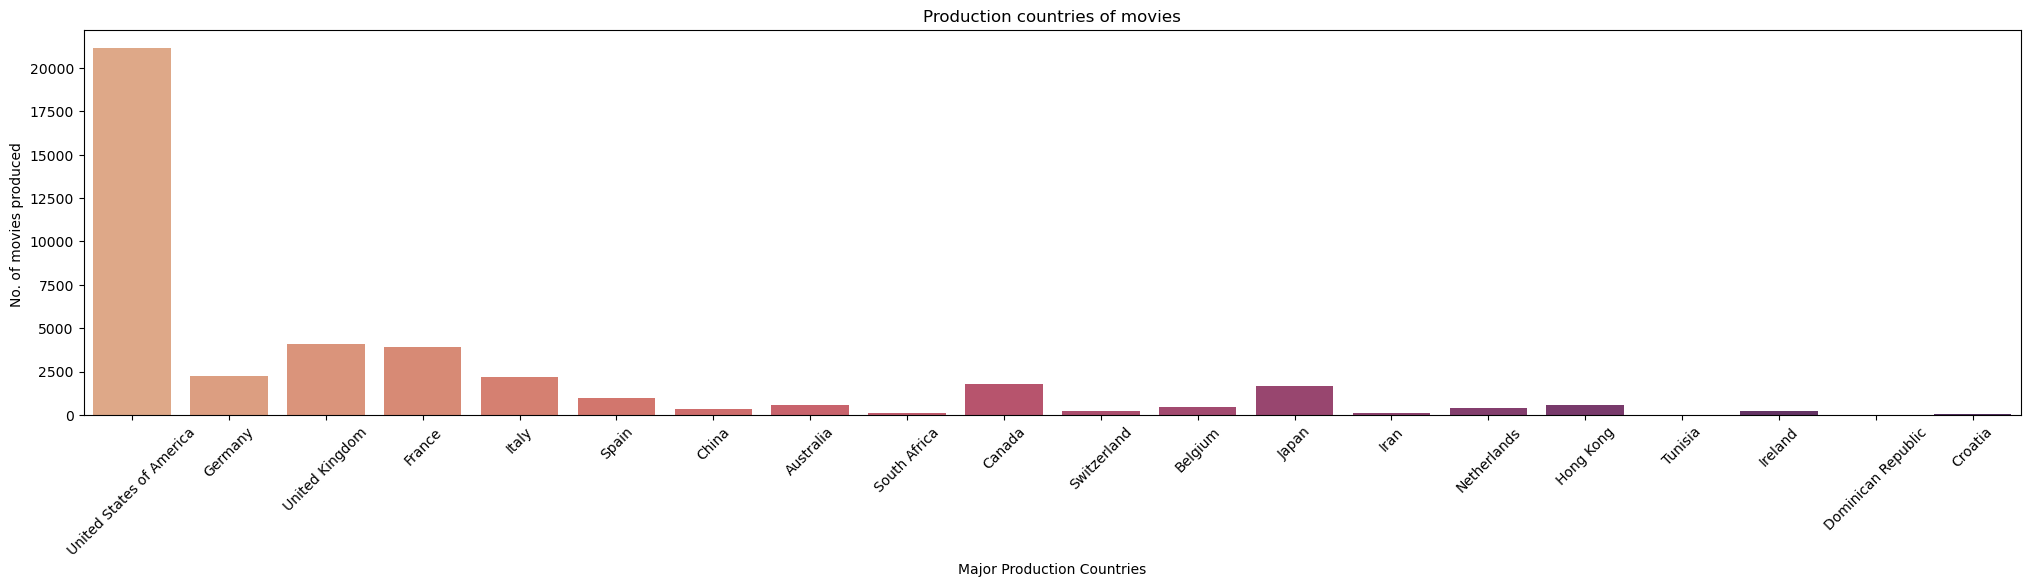

In [86]:
fig = plt.figure(figsize = (25, 5))
countries_keys = list(all_countries.keys())[0:20]
countries_values = [int(i) for i in all_countries.values()][0:20]
sns.barplot(x=countries_keys, y = countries_values, palette='flare')
plt.xticks(rotation=45)
plt.xlabel('Major Production Countries')
plt.ylabel('No. of movies produced ')
plt.title('Production countries of movies')
plt.show()

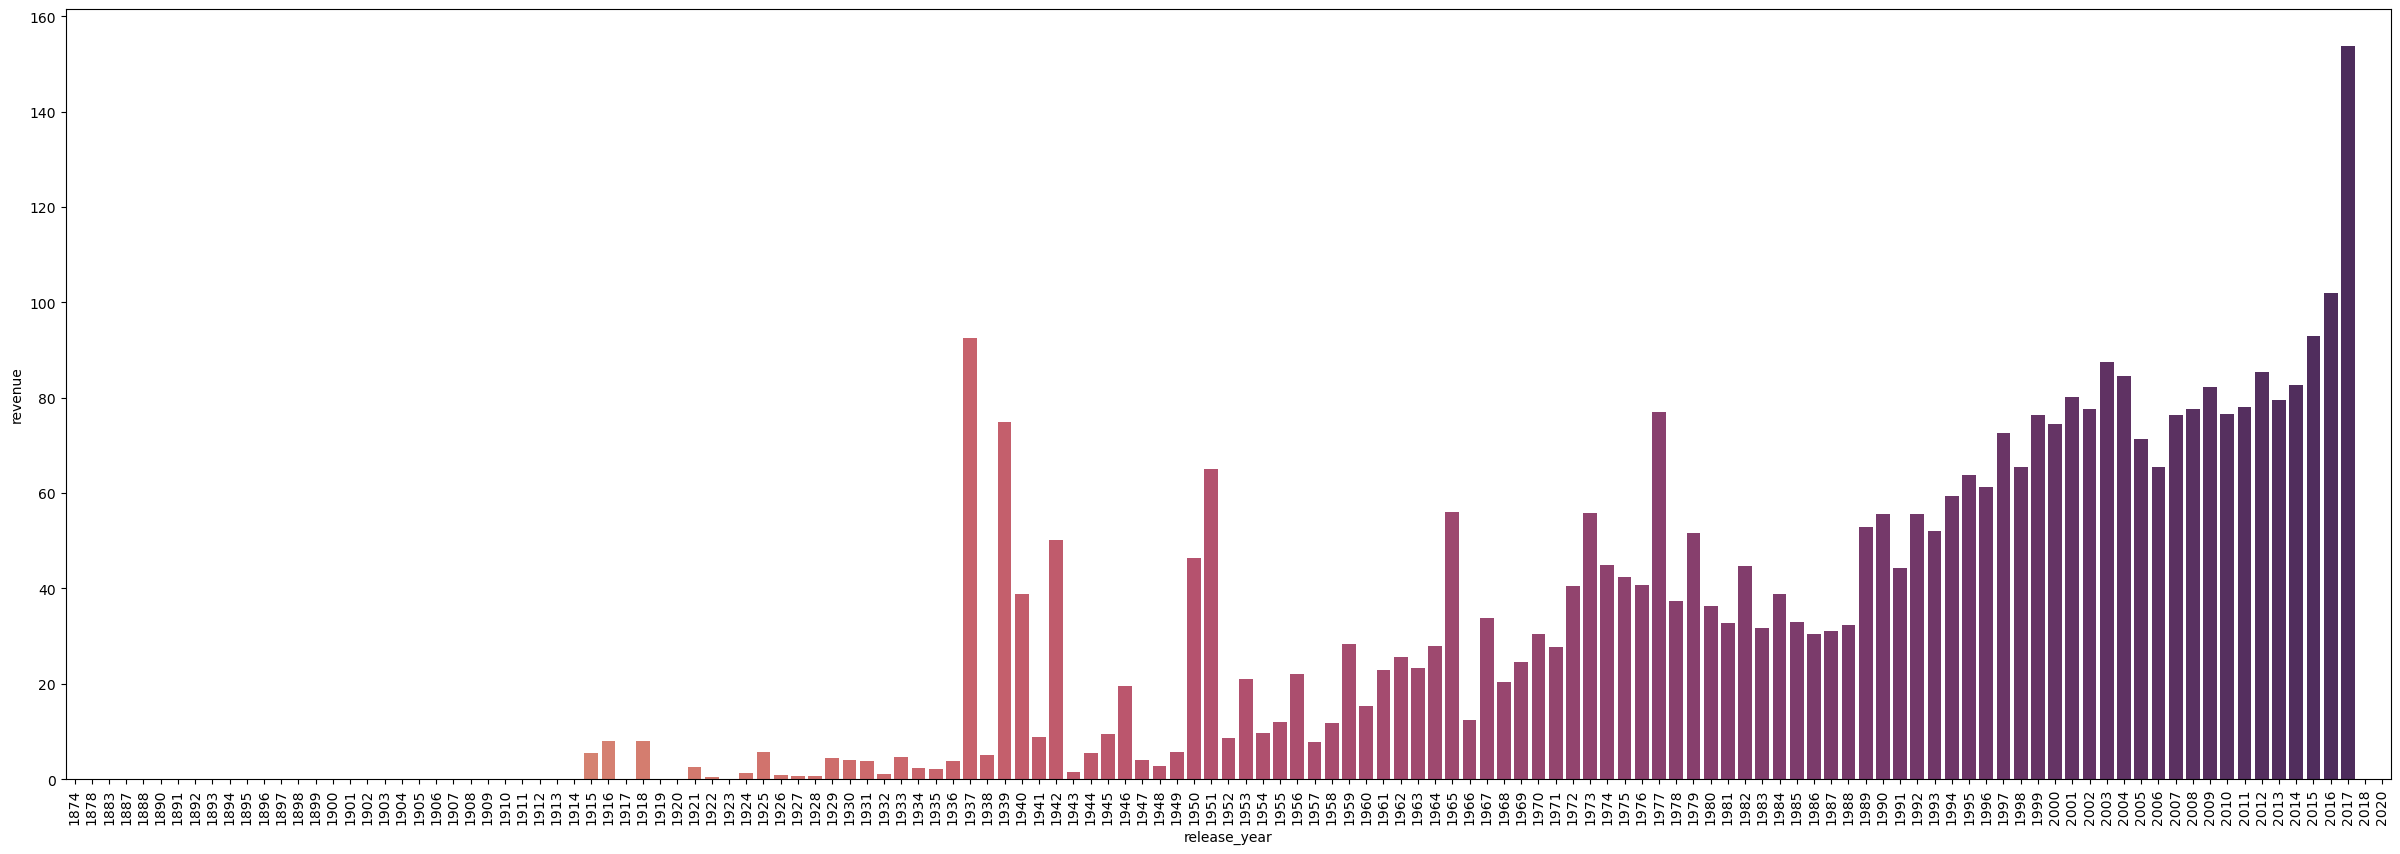

In [87]:
plt.figure(figsize=(30,10))
sns.barplot(data = movies, x='release_year',y='revenue',errorbar=None, palette = 'flare')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_20/2012854442.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data= movies , x= 'release_year',y='runtime', palette='falre')


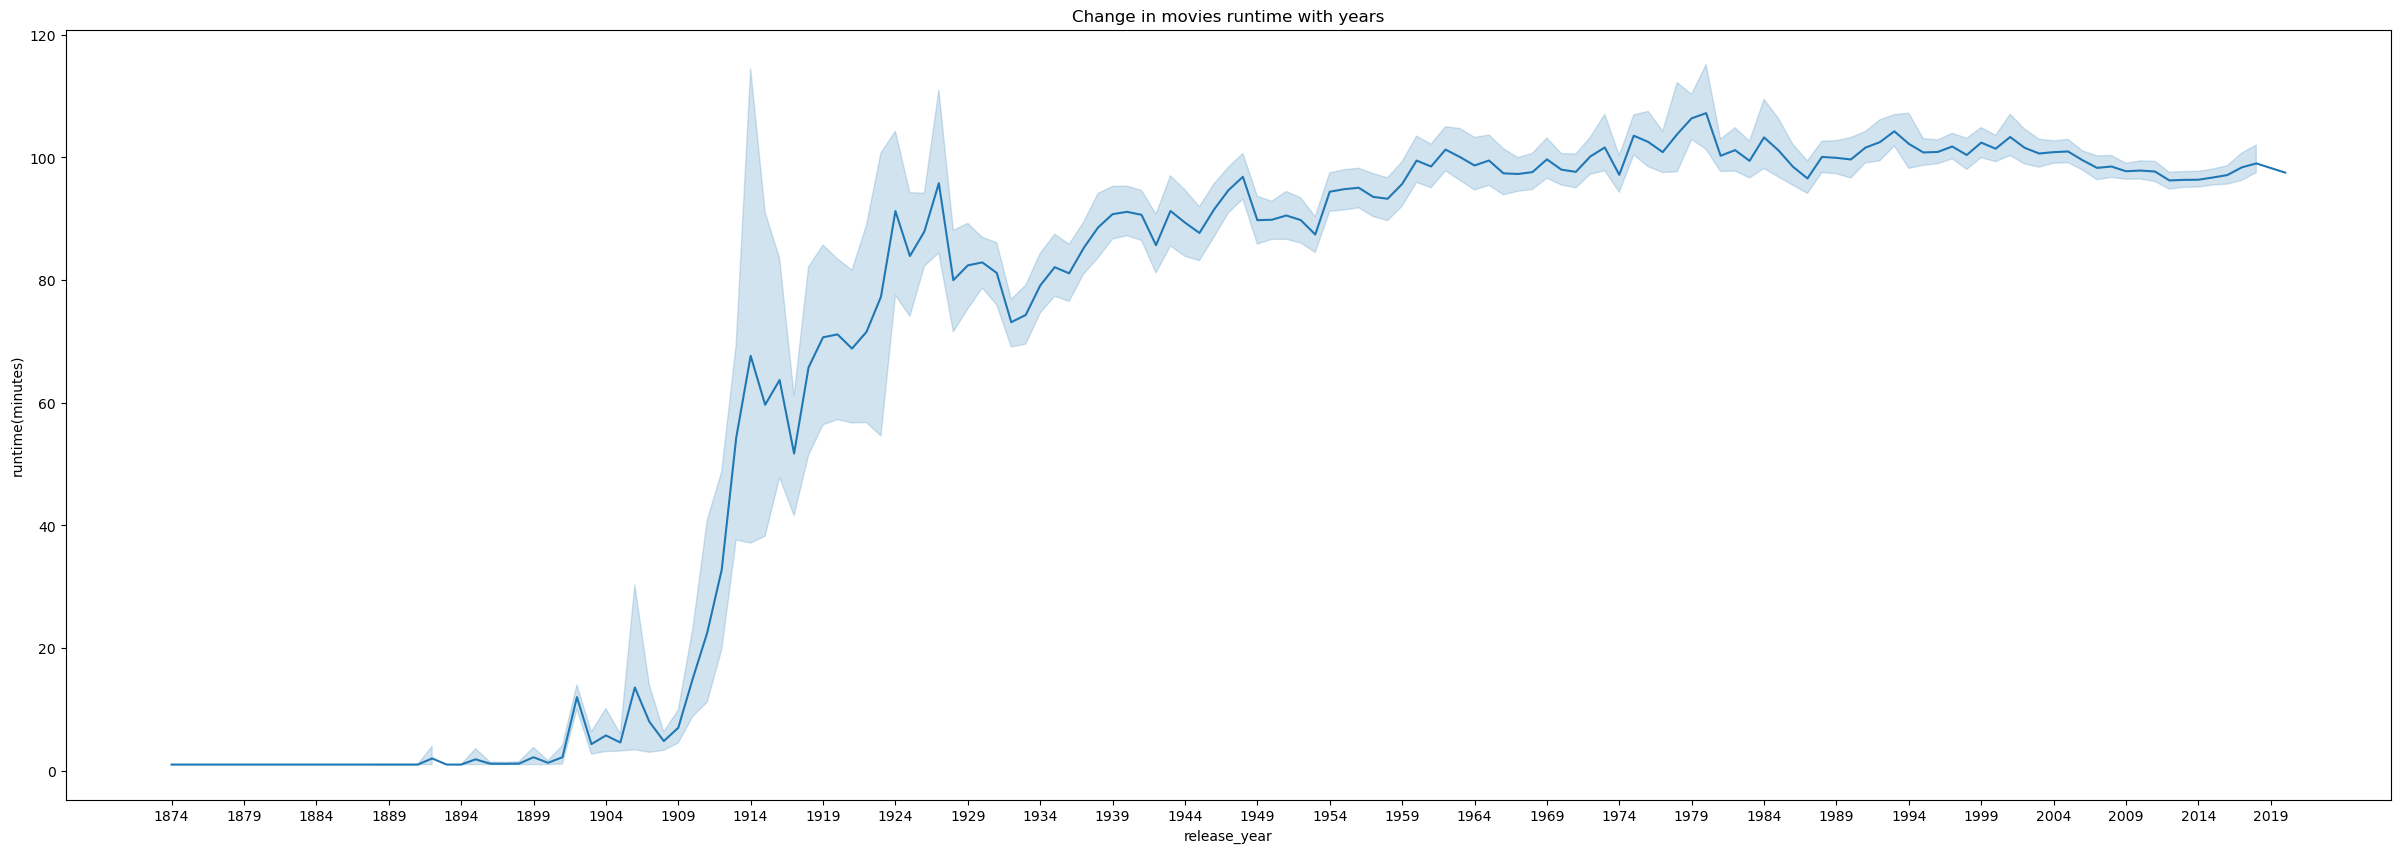

In [88]:
fig = plt.figure(figsize = (30, 10))
sns.lineplot(data= movies , x= 'release_year',y='runtime', palette='falre')
plt.ylabel('runtime(minutes)')
plt.xticks(np.arange(1874, 2024, 5.0))
plt.title('Change in movies runtime with years')
plt.show()

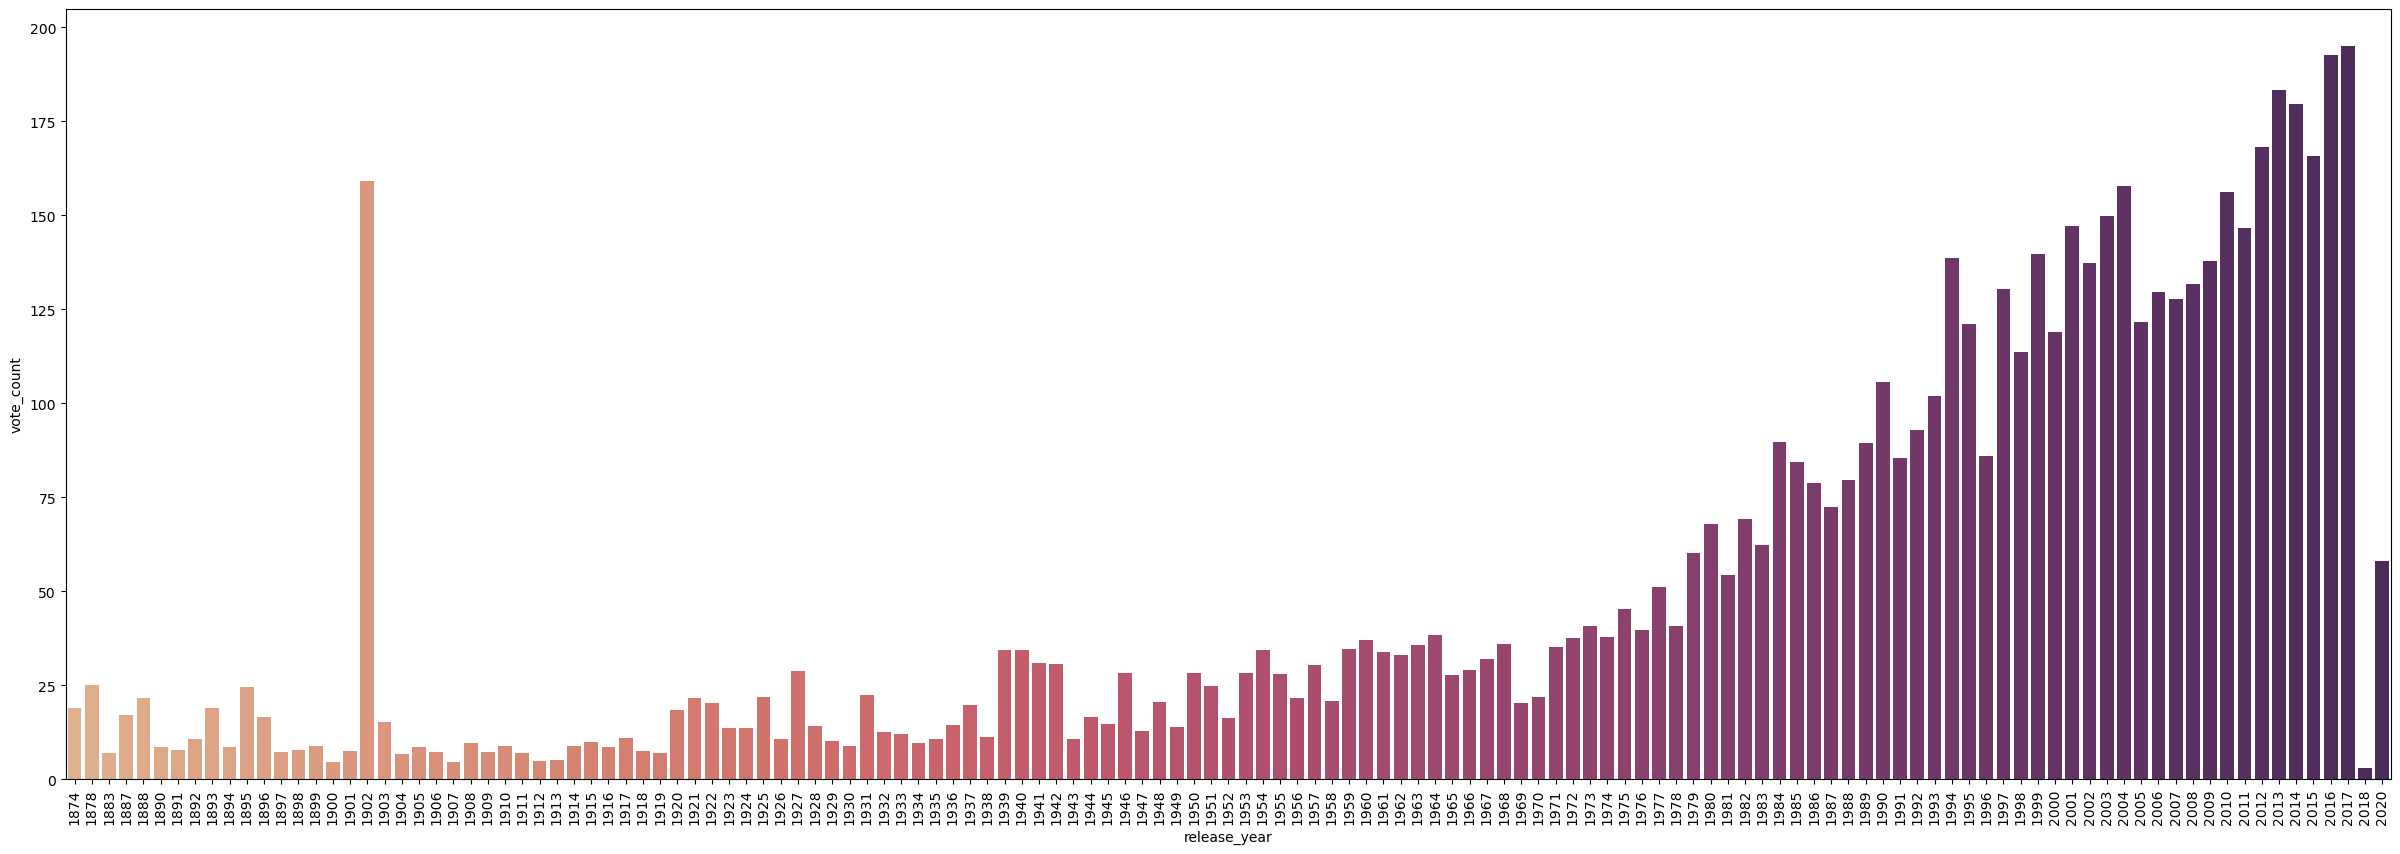

In [89]:
plt.figure(figsize=(30,10))
sns.barplot(x=movies['release_year'],y=movies['vote_count'],errorbar=None, palette = 'flare')
plt.xticks(rotation=90)
plt.show()

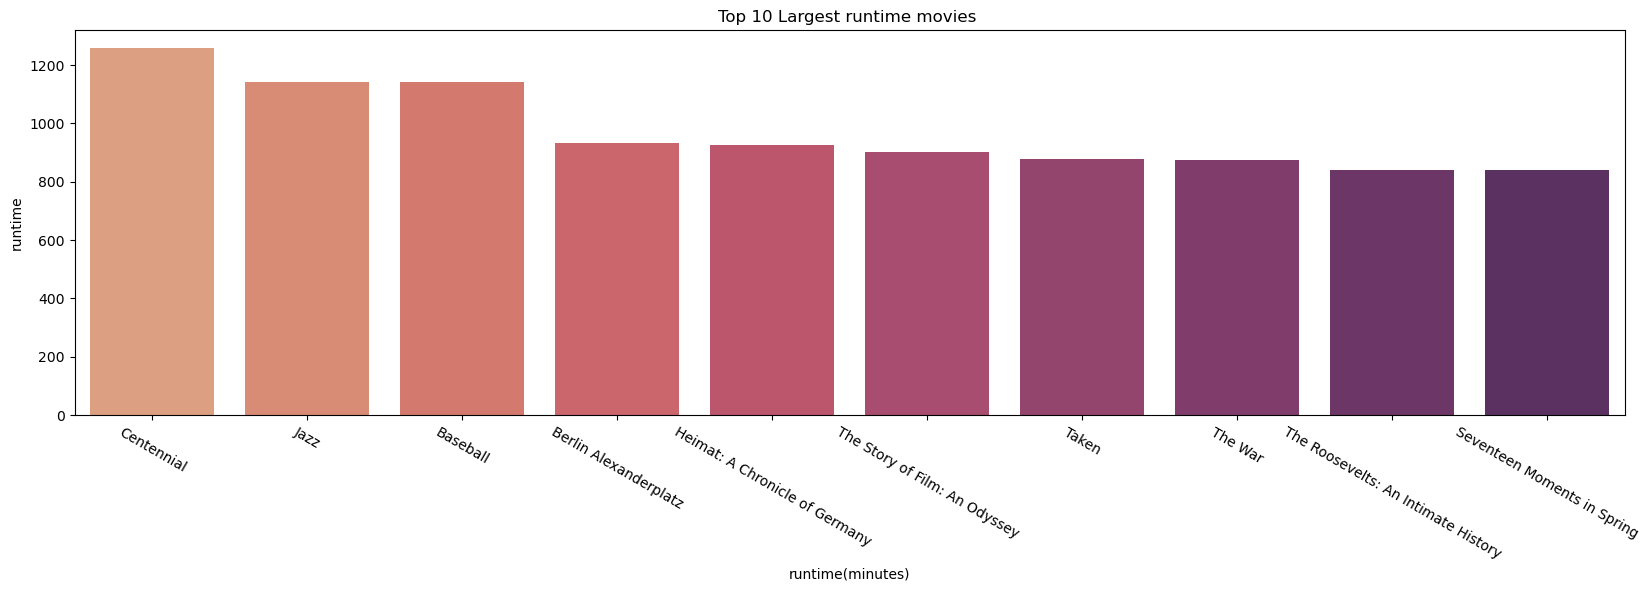

In [90]:
largest_runtime = movies.nlargest(10,'runtime')[['runtime','release_year','title']]

plt.figure(figsize=(20,5))
sns.barplot(x=largest_runtime['title'],y=largest_runtime['runtime'],errorbar=None , palette = 'flare')
plt.xlabel('runtime(minutes)')
locs, labels = plt.xticks()
plt.setp(labels, rotation=-30)
plt.title('Top 10 Largest runtime movies ')
plt.show()

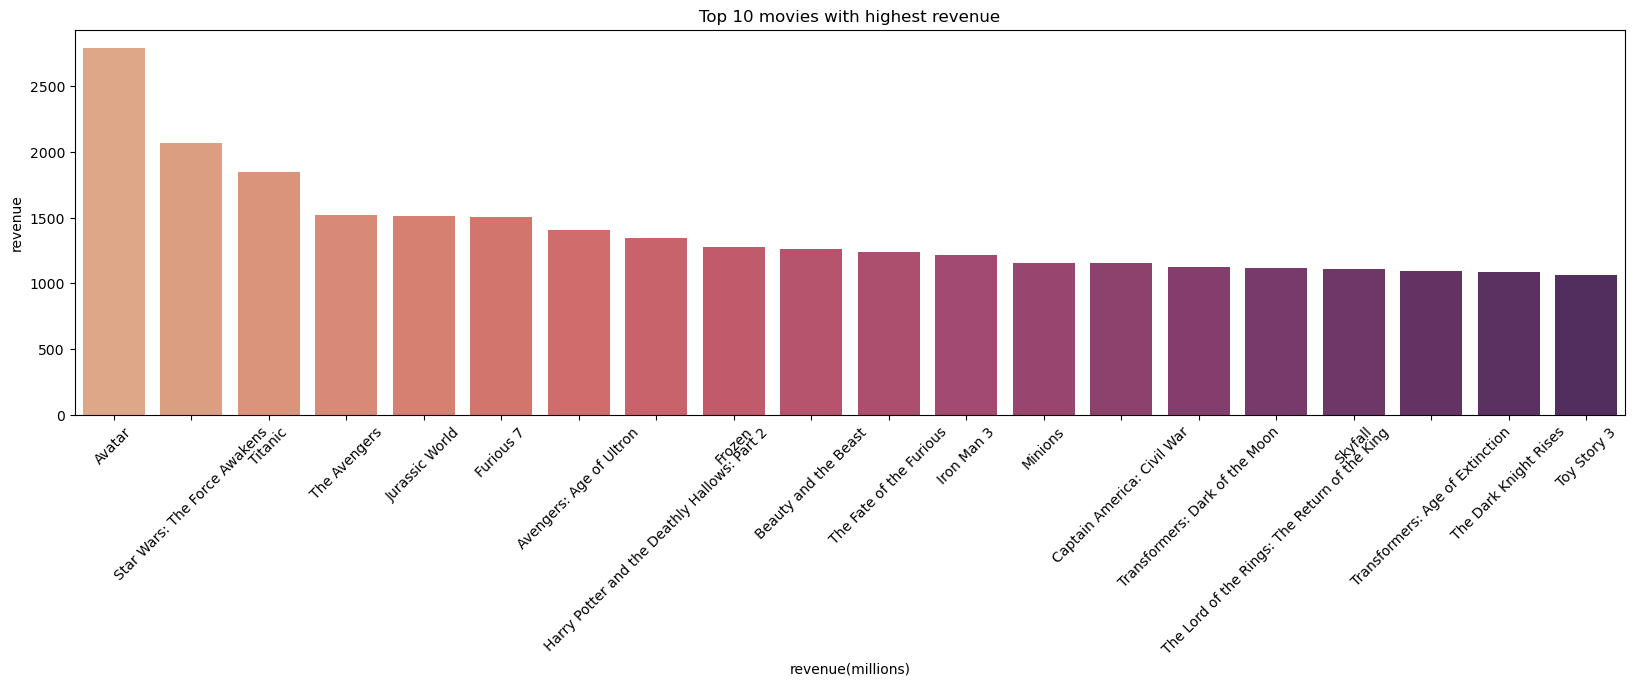

In [91]:
revenue_of_top_20 = movies.sort_values(by='revenue',ascending=False)[0:20][['title','revenue','release_year']]

plt.figure(figsize=(20,5))
sns.barplot(x=revenue_of_top_20['title'],y=revenue_of_top_20['revenue'],errorbar=None , palette = 'flare')
plt.xlabel('revenue(millions)')
plt.title('Top 10 movies with highest revenue')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

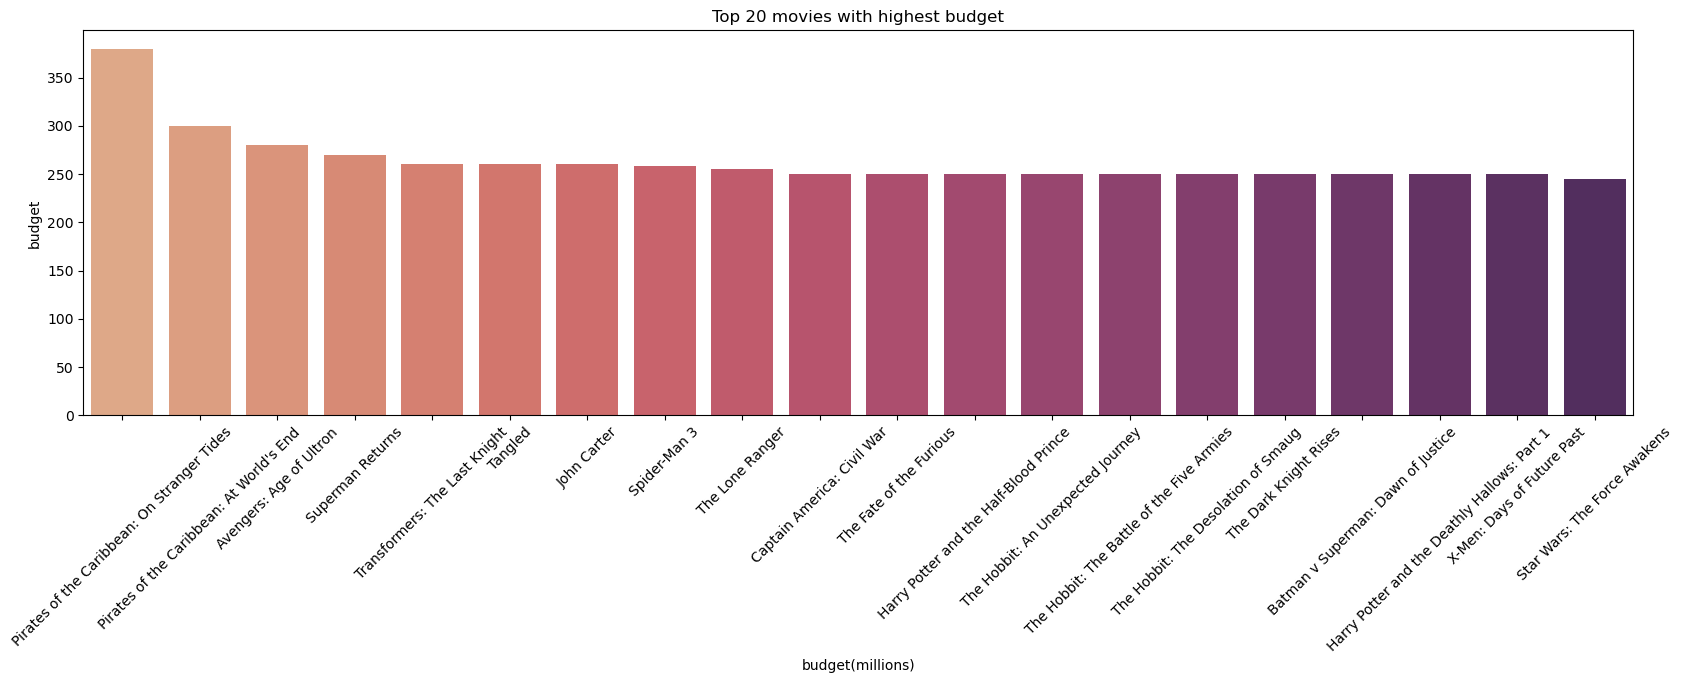

In [92]:
budget_of_top_20 = movies.sort_values(by='budget',ascending=False)[0:20][['title','budget','release_year']]

plt.figure(figsize=(20,5))
sns.barplot(x=budget_of_top_20['title'],y=budget_of_top_20['budget'],errorbar=None , palette = 'flare')
plt.xlabel('budget(millions)')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Top 20 movies with highest budget')
plt.show()

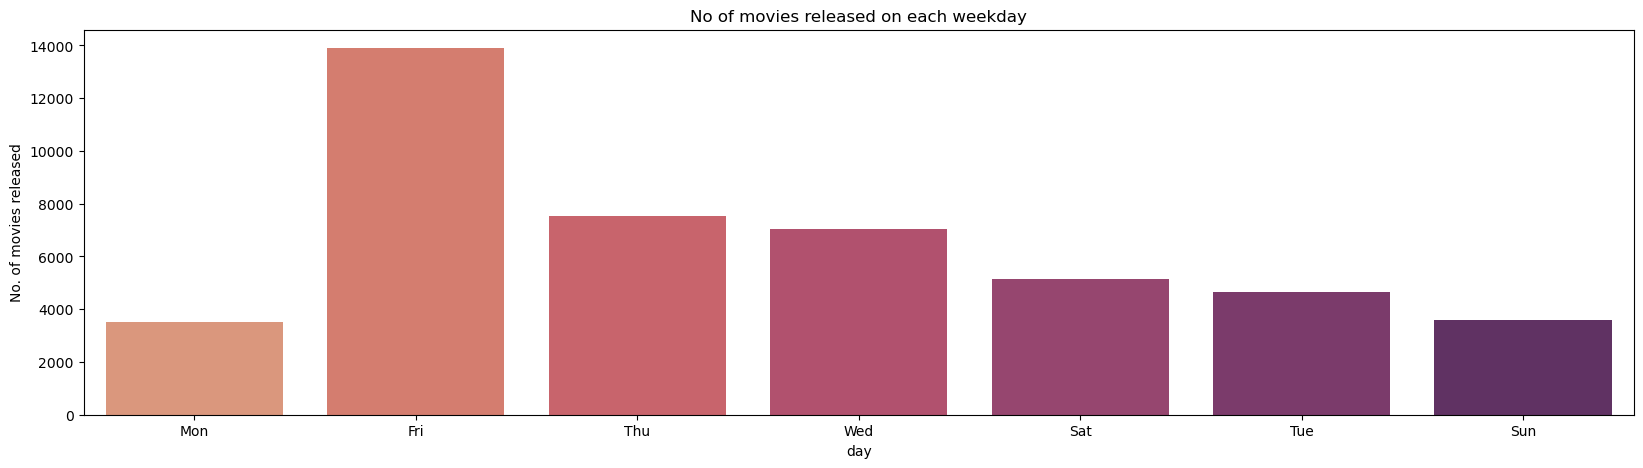

In [93]:
plt.figure(figsize=(20,5))
sns.countplot(x='day',data=movies,palette = 'flare')
plt.ylabel('No. of movies released')
plt.title('No of movies released on each weekday')
plt.show()

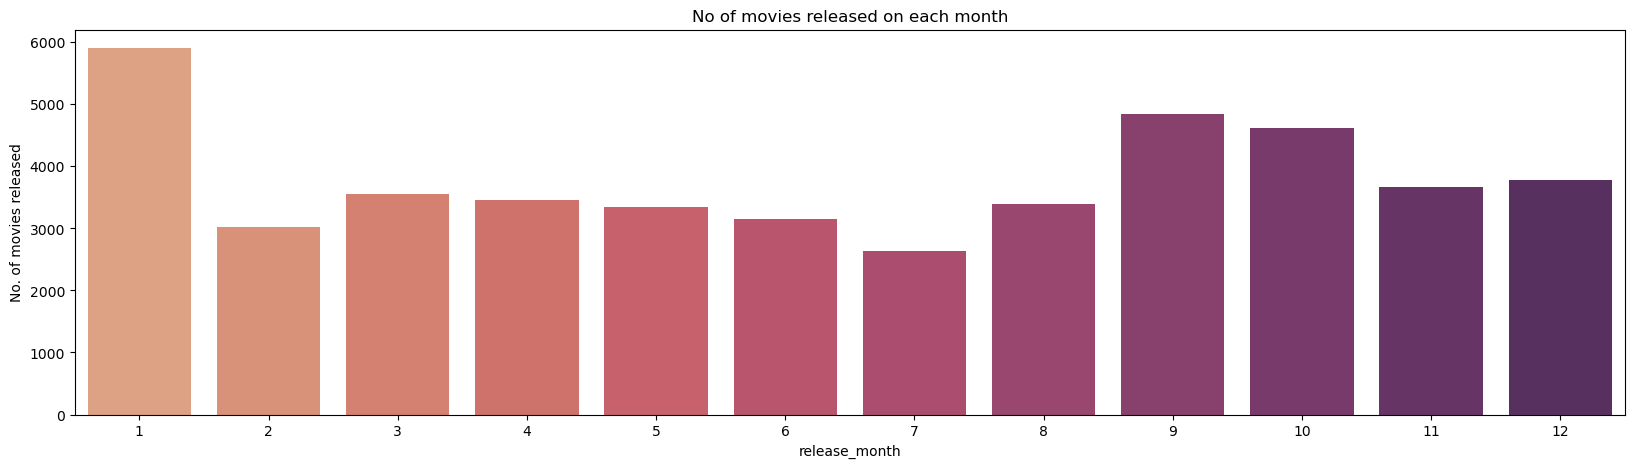

In [94]:
plt.figure(figsize=(20,5))
sns.countplot(x='release_month',data=movies,palette = 'flare')
plt.ylabel('No. of movies released')
plt.title('No of movies released on each month')
plt.show()

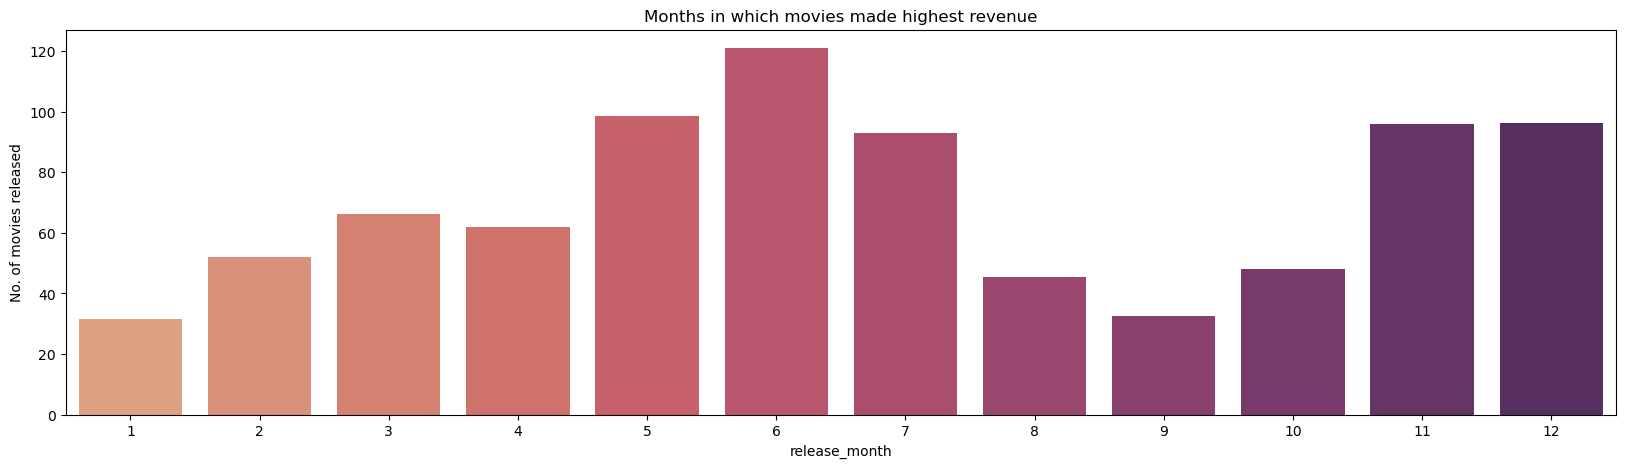

In [95]:
plt.figure(figsize=(20,5))
sns.barplot(x='release_month',y='revenue',data=movies,palette = 'flare',errorbar=None)
plt.ylabel('No. of movies released')
plt.title('Months in which movies made highest revenue')
plt.show()

In [96]:
movies1 = movies.copy()
movies1['revenue_median'] = movies1['revenue'].fillna(movies1['revenue'].median())
movies1['budget_median'] = movies1['budget'].fillna(movies1['budget'].median())
movies1['return'] = movies1['revenue_median'] / movies1['budget_median']

<Axes: xlabel='revenue', ylabel='Density'>

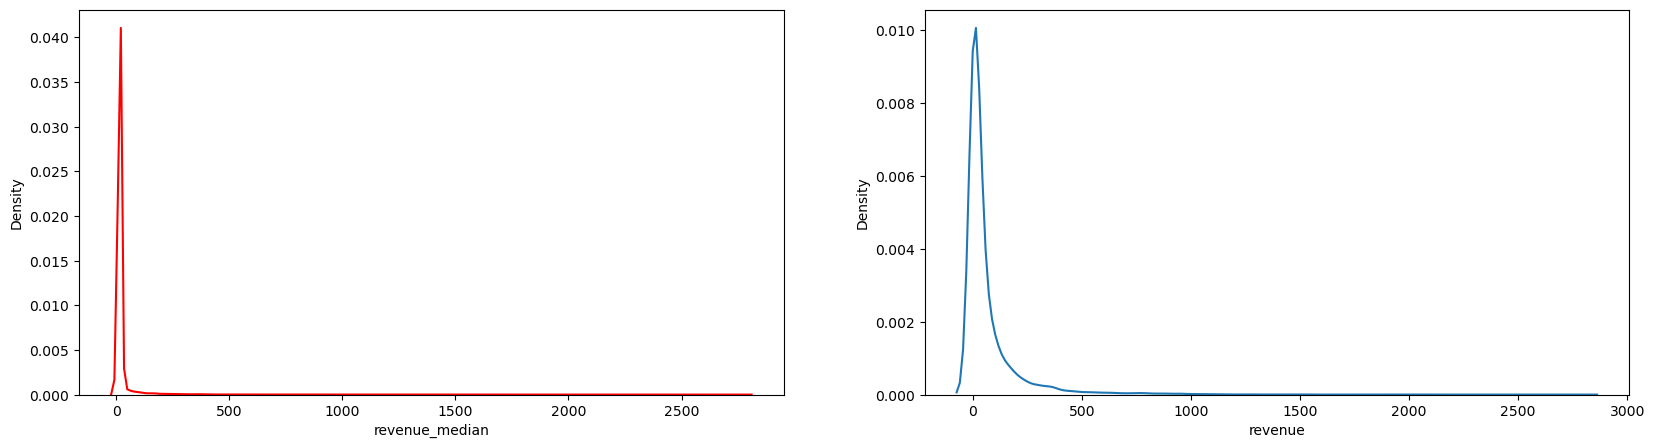

In [97]:
figure, ax = plt.subplots(1, 2 , figsize=(20, 5))
sns.kdeplot(ax=ax[0] , x = movies1['revenue_median'],color = 'red')
sns.kdeplot(ax=ax[1] , x = movies['revenue'])

<Axes: xlabel='revenue', ylabel='Density'>

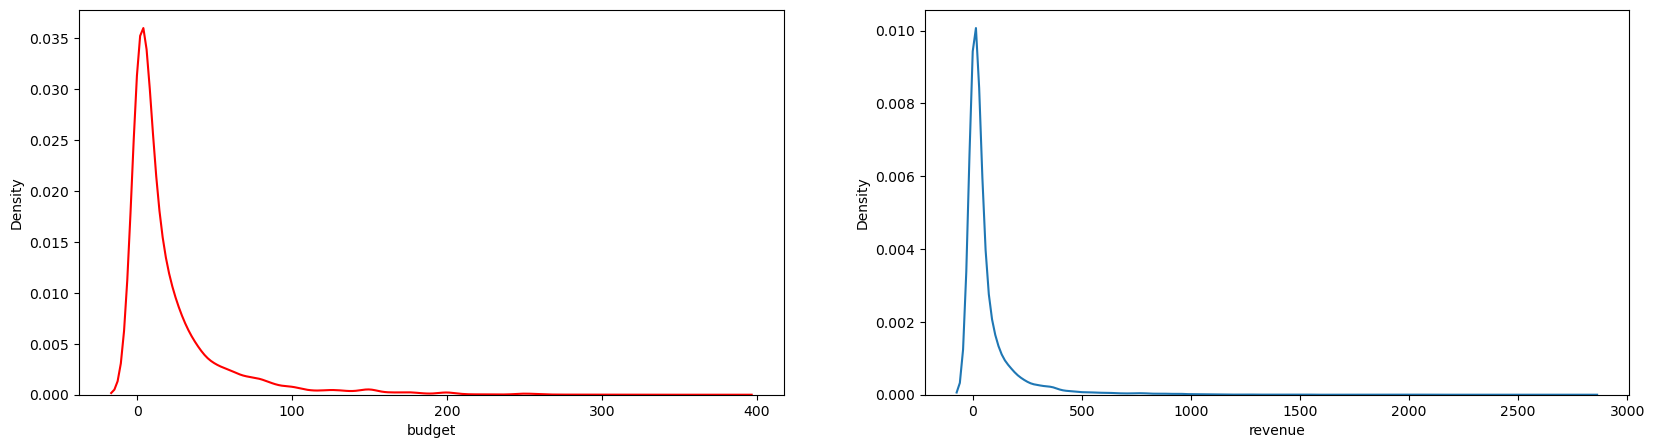

In [98]:
movies2 = movies.drop(['revenue','budget'] , axis=1)
movies3 = movies.copy()
figure, ax = plt.subplots(1, 2 , figsize=(20, 5))
sns.kdeplot(ax=ax[0] , x = movies3['budget'],color = 'red')
sns.kdeplot(ax = ax[1] , x = movies3['revenue'])

/tmp/ipykernel_20/615323122.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(movies.corr(),annot=True)


<Axes: >

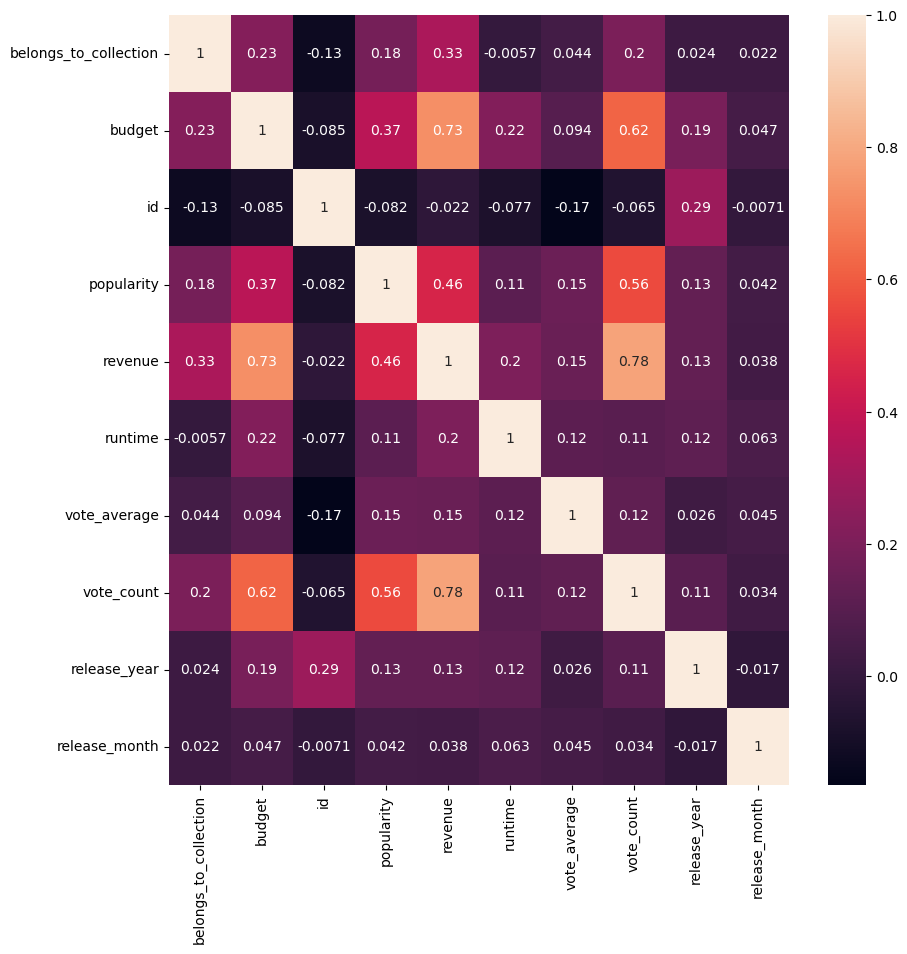

In [99]:
plt.figure(figsize=(10,10))
sns.heatmap(movies.corr(),annot=True)

In [100]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'release_year', 'release_month',
       'collection_name', 'day'],
      dtype='object')

In [101]:
movies[movies['id'] == 224180]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,release_year,release_month,collection_name,day


In [102]:
keywords.drop_duplicates(subset=['id'] , inplace=True)

In [103]:
movies = pd.merge(movies, keywords, on="id", how="left")
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,title,video,vote_average,vote_count,release_year,release_month,collection_name,day,Unnamed: 0,keywords
0,False,1,30.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,False,7.7,5415.0,1995,10,Toy Story Collection,Mon,0.0,"['jealousy', 'toy', 'boy', 'friendship', 'frie..."
1,False,0,65.0,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Jumanji,False,6.9,2413.0,1995,12,None,Fri,1.0,"['board game', 'disappearance', ""based on chil..."
2,False,1,NaN,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Grumpier Old Men,False,6.5,92.0,1995,12,Grumpy Old Men Collection,Fri,2.0,"['fishing', 'best friend', 'duringcreditssting..."
3,False,0,16.0,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Waiting to Exhale,False,6.1,34.0,1995,12,None,Fri,3.0,"['based on novel', 'interracial relationship',..."
4,False,1,NaN,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Father of the Bride Part II,False,5.7,173.0,1995,2,Father of the Bride Collection,Fri,4.0,"['baby', 'midlife crisis', 'confidence', 'agin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45327,False,0,NaN,"[Drama, Action, Romance]",NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",...,Robin Hood,False,5.7,26.0,1991,5,None,Mon,NaN,NaN
45328,False,0,NaN,[Drama],NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,Century of Birthing,False,9.0,3.0,2011,11,None,Thu,31623.0,"['artist', 'play', 'pinoy']"
45329,False,0,NaN,"[Action, Drama, Thriller]",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,Betrayal,False,3.8,6.0,2003,8,None,Fri,NaN,NaN
45330,False,0,NaN,NaN,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,Satan Triumphant,False,0.0,0.0,1917,10,None,Sun,NaN,NaN


In [104]:
movies.drop('Unnamed: 0', axis=1, inplace=True)

In [105]:
credits=pd.read_csv('/kaggle/input/the-movies-dataset/credits.csv')

In [106]:
credits.drop_duplicates(subset=['id'], inplace=True)

In [107]:
movies = pd.merge(movies, credits, on="id", how="left")


In [108]:
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,video,vote_average,vote_count,release_year,release_month,collection_name,day,keywords,cast,crew
0,False,1,30.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,False,7.7,5415.0,1995,10,Toy Story Collection,Mon,"['jealousy', 'toy', 'boy', 'friendship', 'frie...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,0,65.0,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,False,6.9,2413.0,1995,12,None,Fri,"['board game', 'disappearance', ""based on chil...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,1,NaN,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,False,6.5,92.0,1995,12,Grumpy Old Men Collection,Fri,"['fishing', 'best friend', 'duringcreditssting...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,0,16.0,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,False,6.1,34.0,1995,12,None,Fri,"['based on novel', 'interracial relationship',...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,1,NaN,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,False,5.7,173.0,1995,2,Father of the Bride Collection,Fri,"['baby', 'midlife crisis', 'confidence', 'agin...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45327,False,0,NaN,"[Drama, Action, Romance]",NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",...,False,5.7,26.0,1991,5,None,Mon,NaN,"[{'cast_id': 1, 'character': 'Sir Robert Hode'...","[{'credit_id': '52fe44439251416c9100a899', 'de..."
45328,False,0,NaN,[Drama],NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,False,9.0,3.0,2011,11,None,Thu,"['artist', 'play', 'pinoy']","[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de..."
45329,False,0,NaN,"[Action, Drama, Thriller]",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,False,3.8,6.0,2003,8,None,Fri,NaN,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de..."
45330,False,0,NaN,NaN,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,False,0.0,0.0,1917,10,None,Sun,NaN,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de..."


In [109]:
movies = movies.dropna(subset=['cast','crew'] , axis=0)

In [110]:
# movies['crew'] = movies['crew'].apply(to_dict)

In [111]:
def get_director_names(row):
    new_list = ast.literal_eval(row)    
    if new_list == [] or isinstance(new_list,float):
        return np.nan
    else:
        inner = []
        for dictionary in new_list:
            job = dictionary.get('job')
            department = dictionary.get('department')
            if((job == 'Director') & (department == 'Directing')):
                inner.append(dictionary['name'])
        return inner

In [112]:
movies['director'] = movies['crew'].apply(get_director_names)

/tmp/ipykernel_20/792265322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['director'] = movies['crew'].apply(get_director_names)


In [113]:
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,vote_average,vote_count,release_year,release_month,collection_name,day,keywords,cast,crew,director
0,False,1,30.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,7.7,5415.0,1995,10,Toy Story Collection,Mon,"['jealousy', 'toy', 'boy', 'friendship', 'frie...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",[John Lasseter]
1,False,0,65.0,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,6.9,2413.0,1995,12,None,Fri,"['board game', 'disappearance', ""based on chil...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",[Joe Johnston]
2,False,1,NaN,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,6.5,92.0,1995,12,Grumpy Old Men Collection,Fri,"['fishing', 'best friend', 'duringcreditssting...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",[Howard Deutch]
3,False,0,16.0,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,6.1,34.0,1995,12,None,Fri,"['based on novel', 'interracial relationship',...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",[Forest Whitaker]
4,False,1,NaN,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,5.7,173.0,1995,2,Father of the Bride Collection,Fri,"['baby', 'midlife crisis', 'confidence', 'agin...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",[Charles Shyer]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45327,False,0,NaN,"[Drama, Action, Romance]",NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",...,5.7,26.0,1991,5,None,Mon,NaN,"[{'cast_id': 1, 'character': 'Sir Robert Hode'...","[{'credit_id': '52fe44439251416c9100a899', 'de...",[John Irvin]
45328,False,0,NaN,[Drama],NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,9.0,3.0,2011,11,None,Thu,"['artist', 'play', 'pinoy']","[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",[Lav Diaz]
45329,False,0,NaN,"[Action, Drama, Thriller]",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,3.8,6.0,2003,8,None,Fri,NaN,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",[Mark L. Lester]
45330,False,0,NaN,NaN,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,0.0,0.0,1917,10,None,Sun,NaN,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",[Yakov Protazanov]


In [114]:
def json_to_list(row,want='name'):
    new_list = ast.literal_eval(row)    
    if new_list == [] or isinstance(new_list,float):
        return (np.nan)
    else:
        inner = []
        for j in new_list:
            inner.append(j[want])
        return (inner)
    

In [115]:
movies['casting'] = movies['cast'].apply(json_to_list)

/tmp/ipykernel_20/2939321557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['casting'] = movies['cast'].apply(json_to_list)


In [116]:
actors = get_all_items(movies , 'casting')
actors = {k:v for (k,v) in actors.items() if v > 70}

# get the number of movies directed by each director
director = get_all_items(movies , 'director')
director = {k:v for (k,v) in director.items() if v > 30}

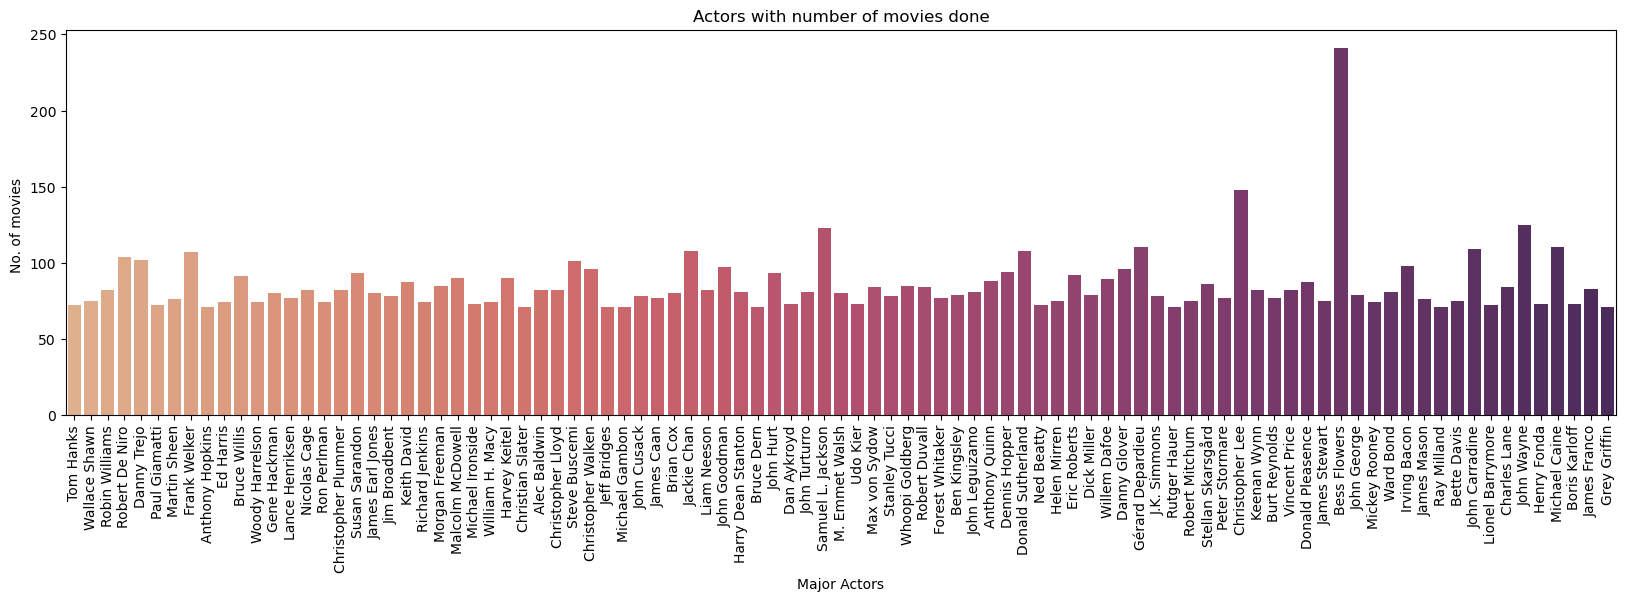

In [117]:
fig = plt.figure(figsize = (20, 5))
actor_keys = list(actors.keys())
actor_values = [int(i) for i in actors.values()]
sns.barplot(x=actor_keys, y = actor_values , palette = 'flare')
plt.xticks(rotation=90)
plt.xlabel('Major Actors')
plt.ylabel('No. of movies ')
plt.title('Actors with number of movies done')
plt.show()

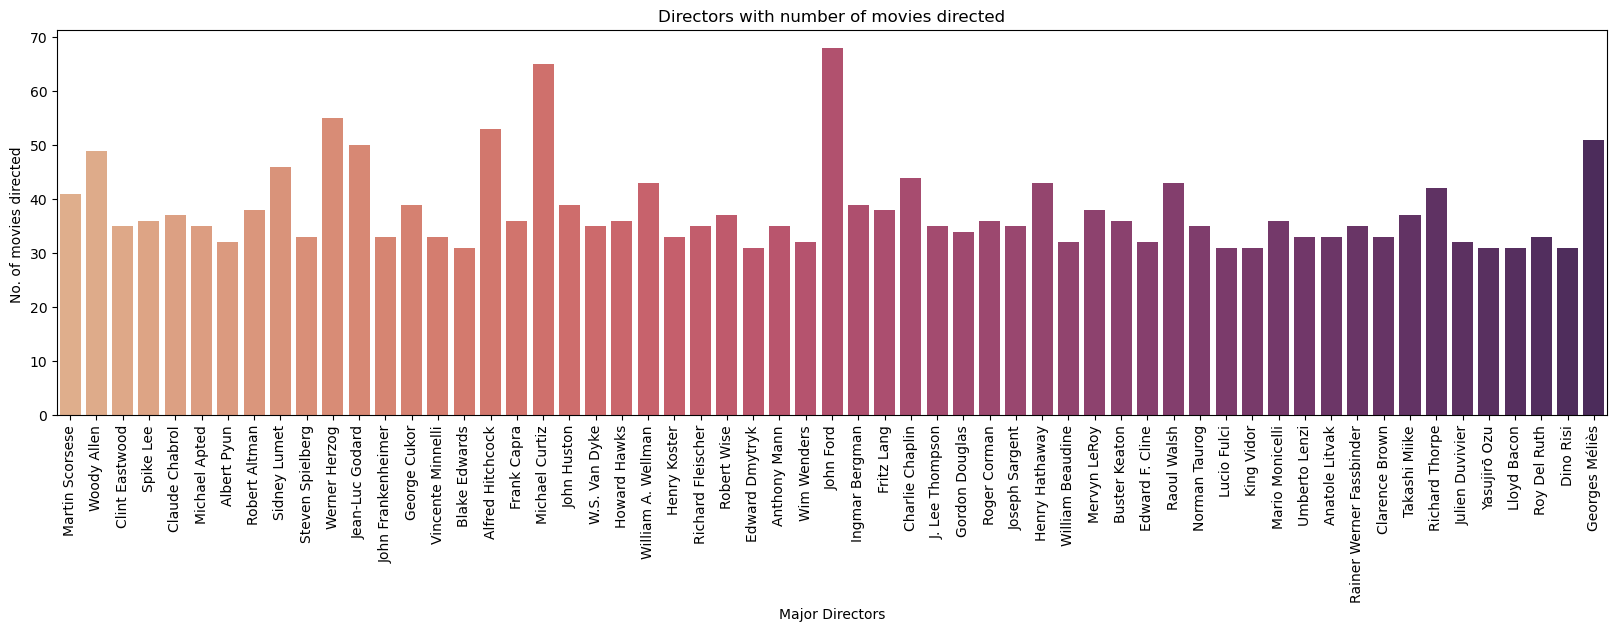

In [118]:
fig = plt.figure(figsize = (20, 5))
dir_keys = list(director.keys())
dir_values = [int(i) for i in director.values()]
sns.barplot(x=dir_keys, y = dir_values, palette = 'flare')
plt.xticks(rotation=90)
plt.xlabel('Major Directors')
plt.ylabel('No. of movies directed ')
plt.title('Directors with number of movies directed')
plt.show()

In [119]:
def get_writer_names(row):
    new_list = ast.literal_eval(row)    
    if new_list == [] or isinstance(new_list,float):
        return np.nan
    else:
        inner = []
        for dictionary in new_list:
            job = dictionary.get('job')
            department = dictionary.get('department')
            if((job == 'Screenplay') & (department == 'Writing')):
                inner.append(dictionary['name'])
        return inner

In [120]:
movies['writer'] = movies['crew'].apply(get_writer_names)

/tmp/ipykernel_20/342462711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['writer'] = movies['crew'].apply(get_writer_names)


In [121]:
writer = get_all_items(movies , 'writer')
writer = {k:v for (k,v) in writer.items() if v > 15}

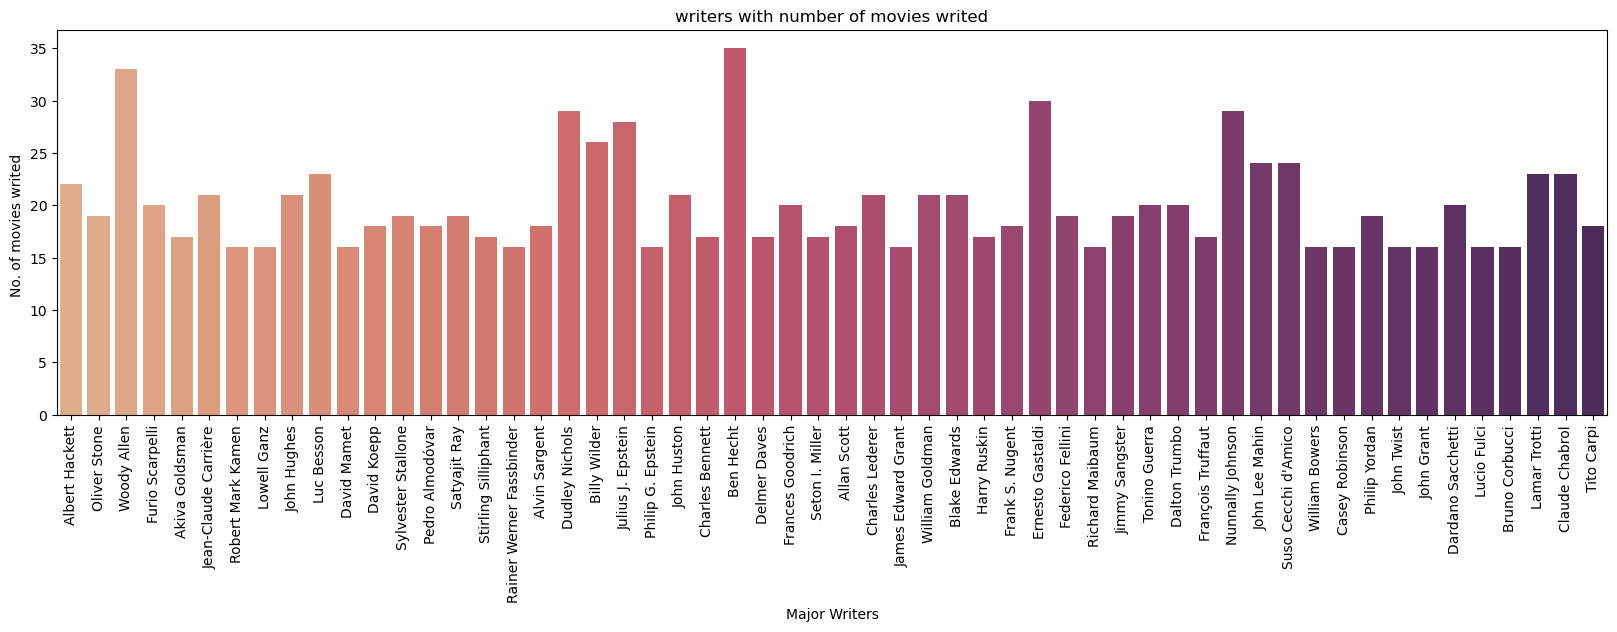

In [122]:
fig = plt.figure(figsize = (20, 5))
dir_keys = list(writer.keys())
dir_values = [int(i) for i in writer.values()]
sns.barplot(x=dir_keys, y = dir_values, palette = 'flare')
plt.xticks(rotation=90)
plt.xlabel('Major Writers')
plt.ylabel('No. of movies writed ')
plt.title('writers with number of movies writed')
plt.show()

In [123]:
def get_producer_names(row):
    new_list = ast.literal_eval(row)    
    if new_list == [] or isinstance(new_list,float):
        return np.nan
    else:
        inner = []
        for dictionary in new_list:
            job = dictionary.get('job')
            department = dictionary.get('department')
            if((job == 'Producer') & (department == 'Production')):
                inner.append(dictionary['name'])
        return inner

In [124]:
movies['producer'] = movies['crew'].apply(get_producer_names)

/tmp/ipykernel_20/1491683493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['producer'] = movies['crew'].apply(get_producer_names)


In [125]:
producer = get_all_items(movies , 'producer')
producer = {k:v for (k,v) in producer.items() if v > 20}

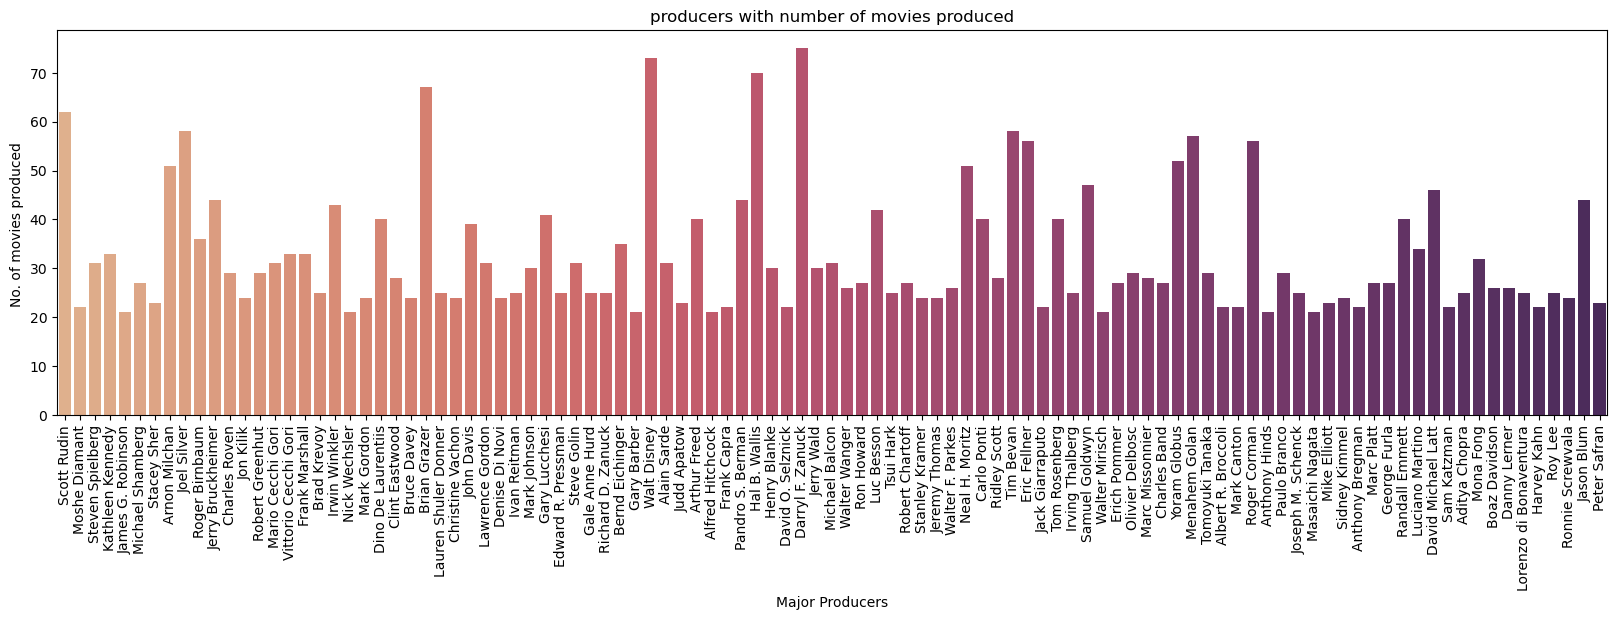

In [126]:
fig = plt.figure(figsize = (20, 5))
dir_keys = list(producer.keys())
dir_values = [int(i) for i in producer.values()]
sns.barplot(x=dir_keys, y = dir_values, palette = 'flare')
plt.xticks(rotation=90)
plt.xlabel('Major Producers')
plt.ylabel('No. of movies produced ')
plt.title('producers with number of movies produced')
plt.show()

In [127]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'release_year', 'release_month',
       'collection_name', 'day', 'keywords', 'cast', 'crew', 'director',
       'casting', 'writer', 'producer'],
      dtype='object')

In [128]:
movies['video'].value_counts()

False    45242
True        89
Name: video, dtype: int64

In [129]:
edited_movies = movies.drop(['adult', 'homepage', 'imdb_id', 'original_title', 'poster_path', 'release_date', 'video', 'cast', 'crew'], axis=1)

In [130]:
edited_movies.to_csv('edited_movies.csv')

In [131]:
edited_movies.isna().sum()

belongs_to_collection        0
budget                   36456
genres                    2380
id                           0
original_language           11
overview                   939
popularity                   0
production_companies     11781
production_countries      6202
revenue                  37934
runtime                      0
spoken_languages          3883
status                       0
tagline                  24950
title                        0
vote_average                 0
vote_count                   0
release_year                 0
release_month                0
collection_name              0
day                          0
keywords                 14259
director                   721
casting                   2346
writer                     721
producer                   721
dtype: int64